In [294]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline

In [295]:
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

## Series

Объект  Series  можно  создать  с  использованием  нескольких  методов:  
- с помощью питоновского списка или словаря 
- с помощью массивов NumPy 
- скалярного значения 

In [296]:
# объект Series, первый столбец индексы - числовые метки
sr = pd.Series([10, 20, 30, 40, 50])
sr

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [297]:
# ключи - метки для индекса
dct = {'a': 1, 'b': 2, 'c': 3}
sr_d = pd.Series(dct)
sr_d

a    1
b    2
c    3
dtype: int64

In [298]:
# извлечение по позициям
print(sr[3])
print(sr[2:4])
print(sr[[1,3]])  # маскирование
print(sr[np.arange(0, sr.size, 2)])  # маскирование

40
2    30
3    40
dtype: int64
1    20
3    40
dtype: int64
0    10
2    30
4    50
dtype: int64


In [299]:
# явное указание меток - параметр index
sr1 = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
sr1

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [300]:
# извлечение по метке индекса
print(sr1['b':'d'])

b    2
c    3
d    4
dtype: int64


In [301]:
# всегда можно сослаться на элементы с помощью численной позиции индекса (от 0 и дальше)
print(sr1[['b', 'd']])
print(sr1[[1,3]])

b    2
d    4
dtype: int64
b    2
d    4
dtype: int64


In [302]:
# Свойство .loc осуществляет поиск по метке индекса, тогда 
# как свойство .iloc осуществляет поиск по позиции, начинающейся с 0
print(sr1.iloc[2])
print(sr1.loc['c'])

3
3


In [303]:
# временной индекс
dates_indx = pd.date_range('2024-01-25', '2024-01-29')
sr2 = pd.Series([10, 20, 30, 40 ,50], index=dates_indx)
print(sr2)
print(sr2['2024-01-27'])
print(sr[2])

2024-01-25    10
2024-01-26    20
2024-01-27    30
2024-01-28    40
2024-01-29    50
Freq: D, dtype: int64
30
30


In [304]:
# арифметические операции
a = pd.Series(np.random.randint(-100, 100, 5))
b = pd.Series(np.random.randint(-100, 100, 5))
c = a + b
c

0   -99
1    -5
2    47
3    64
4   -57
dtype: int32

In [305]:
# выравнивание по меткам индекса
sa = pd.Series([1, 2], index=['a', 'b'])
print(sa)
sb = pd.Series([4, 7], index=['b', 'a'])
print(sb)
sa + sb

a    1
b    2
dtype: int64
b    4
a    7
dtype: int64


a    8
b    6
dtype: int64

In [306]:
# выравнивание по меткам индекса (метки различны)
# если выравнивание по неидентичным меткам индекса - результат NaN
sa1 = pd.Series([1, 2], index=['a', 'b'])
print(sa1)
sb1 = pd.Series([4, 7], index=['b', 'c'])
print(sb1)
sa1 + sb1

a    1
b    2
dtype: int64
b    4
c    7
dtype: int64


a    NaN
b    6.0
c    NaN
dtype: float64

In [307]:
# умножение на скаляр
sa * 3

a    3
b    6
dtype: int64

In [308]:
# среднее значение
c.mean()

-10.0

In [309]:
# размер, размерность
print(c.size)
print(c.shape)

5
(5,)


In [310]:
# логический отбор
sl = pd.Series(np.random.uniform(-20, 20, 25))
sl[(sl >= 7) & (sl <= 10)]

7     7.422902
10    8.013448
18    7.335114
dtype: float64

In [311]:
# логический отбор (функции)
print((sl > 2).any())
print((sl > 0).all())
print((sl > 10).sum()) # кол-во элементов больше 10

True
False
5


In [312]:
# переиндексация
sp1 = pd.Series(np.random.randn(4), index = ['a', 'b', 'c', 'd'])
print(sp1)
# добавляется новая метка 'e', метки 'b' и 'c' удаляются
# значения NaN в новых метках (метка 'e') заполняем 0
sp2 = sp1.reindex(['a', 'd', 'e'], fill_value=0)  
print(sp2)

a   -0.347376
b    1.229611
c   -3.780168
d    0.201032
dtype: float64
a   -0.347376
d    0.201032
e    0.000000
dtype: float64


In [313]:
# заполнение отсутствующих строк (по меткам индексов)
sz = pd.Series(['one', 'two', 'three', 'four'], index = [1, 3, 5, 8])
print(sz)
sz1 = sz.reindex(np.arange(10), method='ffill') # прямое заполнение (последнее известное значении)
print(sz1)
sz2 = sz.reindex(np.arange(10), method='bfill') # обратное заполнение (последнее известное значении)
print(sz2)

1      one
3      two
5    three
8     four
dtype: object
0      NaN
1      one
2      one
3      two
4      two
5    three
6    three
7    three
8     four
9     four
dtype: object
0      one
1      one
2      two
3      two
4    three
5    three
6     four
7     four
8     four
9      NaN
dtype: object


## DataFrame

Датафрейм можно создать из одномерного или многомерного набора данных.
 - Использование результатов функций NumPy  
 - Использование данных из питоновского словаря, состоящего из списков или объектов Series 
 - Использование данных CSV-файла. 

In [314]:
# из одномерного массива
pd.DataFrame(np.random.uniform(-200, 200, 10))

,0
0,-87.514542
1,-122.462378
2,53.672963
3,-51.489354
4,126.940987
5,169.799782
6,-130.328278
7,-130.168626
8,107.571050
9,144.939241


In [315]:
# из двумерного массива
print(pd.DataFrame(np.array([[10,20,30,40,50], [11, 21, 31, 41, 51]])))
print(pd.DataFrame(np.random.uniform(-200, 200, (7, 5))))

    0   1   2   3   4
0  10  20  30  40  50
1  11  21  31  41  51
            0           1           2           3           4
0  145.598534 -147.955431  -97.123978   27.247347 -173.308374
1   89.983778 -131.617535  157.010182   60.553599  -77.508185
2 -153.073663  -73.253801  -91.692900   18.721198  -52.048320
3    7.211681   11.930418  -24.002833  132.828720   34.290126
4  -78.501122   29.776901 -144.325287   45.435345   74.151818
5  192.690860  -42.819371 -169.230149 -134.851289  -72.891377
6  121.700991  102.388713 -134.841841  155.675465 -106.043907


In [316]:
# из словаря
df = pd.DataFrame({'a': a, 'b': b, 'c': c})
df

,a,b,c
0,-84,-15,-99
1,-15,10,-5
2,62,-15,47
3,27,37,64
4,-39,-18,-57


In [317]:
# из объектов Series
# при разной длине идет выравнивание !
sfd1 = pd.Series(np.random.uniform(-200, 200, 6))
sfd2 = pd.Series(np.random.uniform(-200, 200, 4))
df1 = pd.DataFrame([sfd1, sfd2]) 
df1.columns = ['1c', '2c', '3c', '4c', '5c', '6c']
df1

,1c,2c,3c,4c,5c,6c
0,199.177527,110.376381,40.630451,-144.488451,49.959029,-88.640912
1,-167.952149,79.788632,149.088911,-34.882084,NaN,NaN


In [318]:
# кол-во строк
print(len(df))
# размер
print(df.size)
# размерность
print(df.shape)

5
15
(5, 3)


In [ ]:
# изменение типа данных
df = df.astype({'6c': float})

#### Столбцы

In [319]:
# столбцы
df = pd.DataFrame(np.random.randn(7, 5), columns=['one', 'two', 'three', 'four', 'five'])
print(df)
print(df.columns)

        one       two     three      four      five
0  0.052690  0.156791 -0.511626 -0.086755 -0.028427
1  0.775229  1.043834  0.704774  0.078642  0.816841
2  0.150896  0.319196 -0.126914 -0.007515  0.877323
3 -0.204333  1.014806  0.953698  1.169234 -0.031181
4 -0.939725  0.565465 -1.252036  1.189192  0.727612
5  1.776142  1.809258 -1.216216 -0.598028  0.047961
6 -1.381661 -1.700056 -0.504843 -0.250947  0.898558
Index(['one', 'two', 'three', 'four', 'five'], dtype='object')


In [320]:
# извлечь столбец
print(df['one'])
# либо (если в названии нет пробелов)
print(df.one)

0    0.052690
1    0.775229
2    0.150896
3   -0.204333
4   -0.939725
5    1.776142
6   -1.381661
Name: one, dtype: float64
0    0.052690
1    0.775229
2    0.150896
3   -0.204333
4   -0.939725
5    1.776142
6   -1.381661
Name: one, dtype: float64


In [321]:
# извлечь несколько столбцов
df[['two', 'three']]

,two,three
0,0.156791,-0.511626
1,1.043834,0.704774
2,0.319196,-0.126914
3,1.014806,0.953698
4,0.565465,-1.252036
5,1.809258,-1.216216
6,-1.700056,-0.504843


In [322]:
# арифметические операции
dfi = df['four'] - df['five']
dfi

0   -0.058328
1   -0.738199
2   -0.884839
3    1.200414
4    0.461580
5   -0.645989
6   -1.149505
dtype: float64

In [323]:
# добавить столбец
df['new'] = dfi
# добавить столбец в позицию
df.insert(6, 'new_ins', df.one.round() + df.two.median())
# добавить с помощью .loc()
df.loc[:, 'new_loc'] = df.one.round() + df.two.median()
# добавить с помощью .loc() и Series
ser = pd.Series(np.random.uniform(-10, 10, 10), index=np.arange(0, 10))
df.loc[:, 'new_ser'] = ser
df

,one,two,three,four,five,new,new_ins,new_loc,new_ser
0,0.052690,0.156791,-0.511626,-0.086755,-0.028427,-0.058328,0.565465,0.565465,-5.307385
1,0.775229,1.043834,0.704774,0.078642,0.816841,-0.738199,1.565465,1.565465,5.355312
2,0.150896,0.319196,-0.126914,-0.007515,0.877323,-0.884839,0.565465,0.565465,2.795028
3,-0.204333,1.014806,0.953698,1.169234,-0.031181,1.200414,0.565465,0.565465,0.866245
4,-0.939725,0.565465,-1.252036,1.189192,0.727612,0.461580,-0.434535,-0.434535,-0.841729
5,1.776142,1.809258,-1.216216,-0.598028,0.047961,-0.645989,2.565465,2.565465,4.453943
6,-1.381661,-1.700056,-0.504843,-0.250947,0.898558,-1.149505,-0.434535,-0.434535,-6.412675


In [324]:
# добавить столбец с помощью функции apply()
# формирование столбца даты на основе столбцов года, месяца, числа
df_task = pd.DataFrame({'y': [2020, 2021, 2022], 'm': [1, 2, 3], 'd': [8, 9, 10]}, dtype=int)
print(df_task)
df_task['date'] = df_task.apply(lambda row: datetime(*[val for val in row[:3]]), axis=1)
print(df_task)

      y  m   d
0  2020  1   8
1  2021  2   9
2  2022  3  10
      y  m   d       date
0  2020  1   8 2020-01-08
1  2021  2   9 2021-02-09
2  2022  3  10 2022-03-10


In [325]:
# переименование столбцов
# inplace=True без создания копии !
dfr = df.rename(columns={'one': 'one_re', 'four': 'four_re'}, inplace=False)
dfr

,one_re,two,three,four_re,five,new,new_ins,new_loc,new_ser
0,0.052690,0.156791,-0.511626,-0.086755,-0.028427,-0.058328,0.565465,0.565465,-5.307385
1,0.775229,1.043834,0.704774,0.078642,0.816841,-0.738199,1.565465,1.565465,5.355312
2,0.150896,0.319196,-0.126914,-0.007515,0.877323,-0.884839,0.565465,0.565465,2.795028
3,-0.204333,1.014806,0.953698,1.169234,-0.031181,1.200414,0.565465,0.565465,0.866245
4,-0.939725,0.565465,-1.252036,1.189192,0.727612,0.461580,-0.434535,-0.434535,-0.841729
5,1.776142,1.809258,-1.216216,-0.598028,0.047961,-0.645989,2.565465,2.565465,4.453943
6,-1.381661,-1.700056,-0.504843,-0.250947,0.898558,-1.149505,-0.434535,-0.434535,-6.412675


In [326]:
# удаление столбца
del df['new_ser']  # на месте
df.pop('new_loc')  # на месте
df = df.drop(columns=['new_ins'], axis=1)  # вернет новый dataframe
df

,one,two,three,four,five,new
0,0.052690,0.156791,-0.511626,-0.086755,-0.028427,-0.058328
1,0.775229,1.043834,0.704774,0.078642,0.816841,-0.738199
2,0.150896,0.319196,-0.126914,-0.007515,0.877323,-0.884839
3,-0.204333,1.014806,0.953698,1.169234,-0.031181,1.200414
4,-0.939725,0.565465,-1.252036,1.189192,0.727612,0.461580
5,1.776142,1.809258,-1.216216,-0.598028,0.047961,-0.645989
6,-1.381661,-1.700056,-0.504843,-0.250947,0.898558,-1.149505


In [ ]:
# сортировка по столбцу
df = df.sort_values(by='one', ascending=False)

#### Строки

In [327]:
# Полностью строки из датафрейма можно извлечь с помощью свойств 
#.loc и .iloc. Свойство .loc осуществляет поиск по метке индекса, тогда 
# как свойство .iloc осуществляет поиск по позиции, начинающейся с 0
df.index = ['one_idx', 'two_idx', 'three_idx', 'four_idx', 'five_idx', 'six_idx', 'seven_idx']
print(df)
print(df.loc['two_idx']) # строка по метки индекса - вернет Series
print(df.loc[['two_idx', 'seven_idx']]) # несколько строк
print(df.iloc[1]) # строка по позиции - вернет Series
print(df.iloc[[1, 6]]) # несколько строк

                one       two     three      four      five       new
one_idx    0.052690  0.156791 -0.511626 -0.086755 -0.028427 -0.058328
two_idx    0.775229  1.043834  0.704774  0.078642  0.816841 -0.738199
three_idx  0.150896  0.319196 -0.126914 -0.007515  0.877323 -0.884839
four_idx  -0.204333  1.014806  0.953698  1.169234 -0.031181  1.200414
five_idx  -0.939725  0.565465 -1.252036  1.189192  0.727612  0.461580
six_idx    1.776142  1.809258 -1.216216 -0.598028  0.047961 -0.645989
seven_idx -1.381661 -1.700056 -0.504843 -0.250947  0.898558 -1.149505
one      0.775229
two      1.043834
three    0.704774
four     0.078642
five     0.816841
new     -0.738199
Name: two_idx, dtype: float64
                one       two     three      four      five       new
two_idx    0.775229  1.043834  0.704774  0.078642  0.816841 -0.738199
seven_idx -1.381661 -1.700056 -0.504843 -0.250947  0.898558 -1.149505
one      0.775229
two      1.043834
three    0.704774
four     0.078642
five     0.816841
ne

In [328]:
# получение позиции метки
df.index.get_loc('five_idx')

4

In [329]:
# получение среза строк
print(df[:3])
print(df['two_idx':'four_idx']) # по меткам
# с помощью loc и iloc
print(df.iloc[:3])
print(df.loc['two_idx':'four_idx'])

                one       two     three      four      five       new
one_idx    0.052690  0.156791 -0.511626 -0.086755 -0.028427 -0.058328
two_idx    0.775229  1.043834  0.704774  0.078642  0.816841 -0.738199
three_idx  0.150896  0.319196 -0.126914 -0.007515  0.877323 -0.884839
                one       two     three      four      five       new
two_idx    0.775229  1.043834  0.704774  0.078642  0.816841 -0.738199
three_idx  0.150896  0.319196 -0.126914 -0.007515  0.877323 -0.884839
four_idx  -0.204333  1.014806  0.953698  1.169234 -0.031181  1.200414
                one       two     three      four      five       new
one_idx    0.052690  0.156791 -0.511626 -0.086755 -0.028427 -0.058328
two_idx    0.775229  1.043834  0.704774  0.078642  0.816841 -0.738199
three_idx  0.150896  0.319196 -0.126914 -0.007515  0.877323 -0.884839
                one       two     three      four      five       new
two_idx    0.775229  1.043834  0.704774  0.078642  0.816841 -0.738199
three_idx  0.150896 

In [330]:
# добавить новую строку
df.loc['eight_idx'] = [1, 2, 3, 4, 5, 6]
df

,one,two,three,four,five,new
one_idx,0.052690,0.156791,-0.511626,-0.086755,-0.028427,-0.058328
two_idx,0.775229,1.043834,0.704774,0.078642,0.816841,-0.738199
three_idx,0.150896,0.319196,-0.126914,-0.007515,0.877323,-0.884839
four_idx,-0.204333,1.014806,0.953698,1.169234,-0.031181,1.200414
five_idx,-0.939725,0.565465,-1.252036,1.189192,0.727612,0.461580
six_idx,1.776142,1.809258,-1.216216,-0.598028,0.047961,-0.645989
seven_idx,-1.381661,-1.700056,-0.504843,-0.250947,0.898558,-1.149505
eight_idx,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000


In [331]:
# удаление строк
df = df.drop(['one_idx', 'two_idx'])
df

,one,two,three,four,five,new
three_idx,0.150896,0.319196,-0.126914,-0.007515,0.877323,-0.884839
four_idx,-0.204333,1.014806,0.953698,1.169234,-0.031181,1.200414
five_idx,-0.939725,0.565465,-1.252036,1.189192,0.727612,0.461580
six_idx,1.776142,1.809258,-1.216216,-0.598028,0.047961,-0.645989
seven_idx,-1.381661,-1.700056,-0.504843,-0.250947,0.898558,-1.149505
eight_idx,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000


#### Столбцы и строки

In [332]:
# скалярное значение по метке строки и столбца
print(df.at['four_idx', 'four'])
# скалярное значение по позиции строки и столбца
print(df.iat[1, 3])

1.169233635126152
1.169233635126152


In [333]:
# выбор столбцов и строк
print(df[['two', 'three']].iloc[[1, 3]])
# выбор по определенным строкам и столбцам
print(df.loc[['four_idx', 'six_idx', 'eight_idx'], ['one', 'three', 'five']])
# с помощью среза
print(df.loc['three_idx':'six_idx', 'two':'four'])
print(df.iloc[2:5, 1:3])

               two     three
four_idx  1.014806  0.953698
six_idx   1.809258 -1.216216
                one     three      five
four_idx  -0.204333  0.953698 -0.031181
six_idx    1.776142 -1.216216  0.047961
eight_idx  1.000000  3.000000  5.000000
                two     three      four
three_idx  0.319196 -0.126914 -0.007515
four_idx   1.014806  0.953698  1.169234
five_idx   0.565465 -1.252036  1.189192
six_idx    1.809258 -1.216216 -0.598028
                two     three
five_idx   0.565465 -1.252036
six_idx    1.809258 -1.216216
seven_idx -1.700056 -0.504843


In [334]:
# отбор значений
print(df[df.one > 0]) # отбор строк в столбце 'one' у которых значение больше 0
print(df[(df.one > 0) & (df.two > 0)]) # отбор строк в столбцах 'one' и 'two' у которых значение больше 0

                one       two     three      four      five       new
three_idx  0.150896  0.319196 -0.126914 -0.007515  0.877323 -0.884839
six_idx    1.776142  1.809258 -1.216216 -0.598028  0.047961 -0.645989
eight_idx  1.000000  2.000000  3.000000  4.000000  5.000000  6.000000
                one       two     three      four      five       new
three_idx  0.150896  0.319196 -0.126914 -0.007515  0.877323 -0.884839
six_idx    1.776142  1.809258 -1.216216 -0.598028  0.047961 -0.645989
eight_idx  1.000000  2.000000  3.000000  4.000000  5.000000  6.000000


In [335]:
# конкатенация DataFrame
# при разном кол-ве строк или столбцов значения в непересекающихся ячейках будут NaN
dfc1 = pd.DataFrame(np.random.uniform(-200, 200, (10, 5)), columns=['b', 'c', 'd', 'e', 'h'])
dfc2 = pd.DataFrame(np.random.uniform(-200, 200, (7, 6)), columns=['c', 'f', 'g', 'h', 'i', 'j'])
# добавление к строкам
dfc3 = pd.concat([dfc1, dfc2], axis=0, keys=['dfc1', 'dfc2']) 
# добавление к столбцам, дублирование имен столбцов !
dfc4 = pd.concat([dfc1, dfc2], axis=1, keys=['dfc1', 'dfc2'])
print(dfc3)
print(dfc4)

                 b           c           d           e           h           f           g           i           j
dfc1 0   28.208254  141.987531  -67.042642  194.047569  -40.873815         NaN         NaN         NaN         NaN
     1  -99.519728  195.016374  171.747938 -163.858418   35.618397         NaN         NaN         NaN         NaN
     2 -171.248923  153.461836  -89.499701   89.988250   72.852595         NaN         NaN         NaN         NaN
     3   41.552344  -10.727578  106.720023  -28.148627  -86.602660         NaN         NaN         NaN         NaN
     4 -152.652798  176.685126   11.141747 -170.020647  148.061458         NaN         NaN         NaN         NaN
     5  -94.957510  167.172884    8.642223   52.956644   87.538201         NaN         NaN         NaN         NaN
     6  187.335640  179.881861 -180.299809  -88.768660 -146.157198         NaN         NaN         NaN         NaN
     7 -160.579289  -18.913892  124.849861  -37.480535   -0.968232         NaN  

In [336]:
# inner join (пересечение!)
dfc5 = pd.concat([dfc1, dfc2], axis=0, join='inner', keys=['dfc1', 'dfc2'])
# добавление к столбцам, дублирование имен столбцов !
dfc6 = pd.concat([dfc1, dfc2], axis=1, join='inner', keys=['dfc1', 'dfc2'])
print(dfc5)
print(dfc6)

                 c           h
dfc1 0  141.987531  -40.873815
     1  195.016374   35.618397
     2  153.461836   72.852595
     3  -10.727578  -86.602660
     4  176.685126  148.061458
     5  167.172884   87.538201
     6  179.881861 -146.157198
     7  -18.913892   -0.968232
     8 -142.603741 -135.439404
     9  -69.339114 -133.377040
dfc2 0   36.793629  -18.810390
     1  189.745243   93.411553
     2 -102.511756 -171.176011
     3  130.174931   86.584758
     4   17.990909 -114.636016
     5  107.828903   71.176161
     6   35.575745 -161.765876
         dfc1                                                        dfc2                                                            
            b           c           d           e           h           c           f           g           h           i           j
0   28.208254  141.987531  -67.042642  194.047569  -40.873815   36.793629   47.174719  -29.389392  -18.810390 -139.770724  152.025405
1  -99.519728  195.016374  171.747938 -1

In [337]:
# сквозной индекс
# ignore_index=True, ключи не отображаются!
dfc7 = pd.concat([dfc1, dfc2], axis=0, ignore_index=True) 
dfc8 = pd.concat([dfc1, dfc2], axis=1, ignore_index=True)
print(dfc7)
print(dfc8)

             b           c           d           e           h           f           g           i           j
0    28.208254  141.987531  -67.042642  194.047569  -40.873815         NaN         NaN         NaN         NaN
1   -99.519728  195.016374  171.747938 -163.858418   35.618397         NaN         NaN         NaN         NaN
2  -171.248923  153.461836  -89.499701   89.988250   72.852595         NaN         NaN         NaN         NaN
3    41.552344  -10.727578  106.720023  -28.148627  -86.602660         NaN         NaN         NaN         NaN
4  -152.652798  176.685126   11.141747 -170.020647  148.061458         NaN         NaN         NaN         NaN
5   -94.957510  167.172884    8.642223   52.956644   87.538201         NaN         NaN         NaN         NaN
6   187.335640  179.881861 -180.299809  -88.768660 -146.157198         NaN         NaN         NaN         NaN
7  -160.579289  -18.913892  124.849861  -37.480535   -0.968232         NaN         NaN         NaN         NaN
8

In [338]:
# слияние DataFrame
users = {
    'id': [1, 2, 3, 4, 5], 
    'name': ['Username_A', 'Username_B', 'Username_C', 'Username_D', 'Username_E'], 
    'card_id': [101, 201, 301, 401, 501]
}
cards = {
    'card_id': [101, 201, 301, 401, 501],
    'number': [100001, 100002, 100003, 100004, 100005]
}
df_users = pd.DataFrame(users)
df_cards = pd.DataFrame(cards)

print(df_users)
print(df_cards)
# слияние по общему столбцу card_id
df_users.merge(df_cards)

   id        name  card_id
0   1  Username_A      101
1   2  Username_B      201
2   3  Username_C      301
3   4  Username_D      401
4   5  Username_E      501
   card_id  number
0      101  100001
1      201  100002
2      301  100003
3      401  100004
4      501  100005


,id,name,card_id,number
0,1,Username_A,101,100001
1,2,Username_B,201,100002
2,3,Username_C,301,100003
3,4,Username_D,401,100004
4,5,Username_E,501,100005


In [339]:
# слияние по двум общим столбцам key1 и key2
# соответствующие кортежи значений в обоих объектах DataFrame для этих столбцов 
# выглядят как (a, x) и (c, z), поэтому в результате получаем две строки значений.
left_data = {'key1': ['a', 'b', 'c'],  
            'key2': ['x', 'y', 'z'], 
            'lval1': [ 0, 1, 2]} 
right_data = {'key1': ['a', 'b', 'c'], 
              'key2': ['x', 'a', 'z'],  
              'rval1': [ 6, 7, 8 ]} 
left = pd.DataFrame(left_data, index=[0, 1, 2]) 
right = pd.DataFrame(right_data, index=[1, 2, 3])
left.merge(right)

,key1,key2,lval1,rval1
0,a,x,0,6
1,c,z,2,8


In [340]:
# слияние
# виды соединений
users1 = {
    'id': [1, 2, 3, 4, 5], 
    'name': ['Username_A', 'Username_B', 'Username_C', 'Username_D', 'Username_E'], 
    'card_id': [101, 105, 301, 305, 501]
}
cards1 = {
    'card_id': [101, 201, 301, 401, 501],
    'number': [100001, 100002, 100003, 100004, 100005]
}
df_users1 = pd.DataFrame(users1)
df_cards1 = pd.DataFrame(cards1)
print(df_users1)
print(df_cards1)

   id        name  card_id
0   1  Username_A      101
1   2  Username_B      105
2   3  Username_C      301
3   4  Username_D      305
4   5  Username_E      501
   card_id  number
0      101  100001
1      201  100002
2      301  100003
3      401  100004
4      501  100005


In [341]:
# по умолчанию - inner(пересечение)
print(df_users1.merge(df_cards1))
# outer - объединение
print(df_users1.merge(df_cards1, how='outer'))
# left - ключи из левого объекта
print(df_users1.merge(df_cards1, how='left'))
# right - ключи из правого объекта
print(df_users1.merge(df_cards1, how='right'))

   id        name  card_id  number
0   1  Username_A      101  100001
1   3  Username_C      301  100003
2   5  Username_E      501  100005
    id        name  card_id    number
0  1.0  Username_A      101  100001.0
1  2.0  Username_B      105       NaN
2  3.0  Username_C      301  100003.0
3  4.0  Username_D      305       NaN
4  5.0  Username_E      501  100005.0
5  NaN         NaN      201  100002.0
6  NaN         NaN      401  100004.0
   id        name  card_id    number
0   1  Username_A      101  100001.0
1   2  Username_B      105       NaN
2   3  Username_C      301  100003.0
3   4  Username_D      305       NaN
4   5  Username_E      501  100005.0
    id        name  card_id  number
0  1.0  Username_A      101  100001
1  NaN         NaN      201  100002
2  3.0  Username_C      301  100003
3  NaN         NaN      401  100004
4  5.0  Username_E      501  100005


In [342]:
# стыковка
df_stack = pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]}, index=['one', 'two', 'three'])
print(df_stack)
stacked = df_stack.stack()
print(stacked)

       a  b
one    1  4
two    2  5
three  3  6
one    a    1
       b    4
two    a    2
       b    5
three  a    3
       b    6
dtype: int64


In [343]:
# растыковка внутренним ключем
print(stacked.unstack())
# растыковка внешним ключем
print(stacked.unstack(level=0))

       a  b
one    1  4
two    2  5
three  3  6
   one  two  three
a    1    2      3
b    4    5      6


### Индексы

In [344]:
# Индексация по дате и времени
rng_date = pd.date_range('01/01/2024', periods=96, freq='H')
df = pd.DataFrame(np.random.uniform(-20, 20, (96, 5)), index=rng_date)
df

,0,1,2,3,4
2024-01-01 00:00:00,16.051657,-12.955127,-9.565650,3.801039,11.517444
2024-01-01 01:00:00,-5.238398,15.395200,0.190391,-10.100607,15.785805
2024-01-01 02:00:00,-16.732969,13.962849,13.688968,-4.509941,-4.729942
2024-01-01 03:00:00,7.316234,2.249510,1.496439,6.693532,-17.093003
2024-01-01 04:00:00,-15.963453,13.545459,18.034067,-12.278742,10.547651
...,...,...,...,...,...
2024-01-04 19:00:00,-16.521005,-5.533462,9.607543,8.526118,-6.005363
2024-01-04 20:00:00,12.206853,4.085911,-16.983160,-19.522920,16.850345
2024-01-04 21:00:00,17.037023,-6.669493,-18.780934,6.166404,13.273969
2024-01-04 22:00:00,0.491651,-14.329999,10.802606,15.199756,-8.183257


In [345]:
# Индексация периодов времени
periods = pd.PeriodIndex(['2023-11', '2023-12', '2024-01', '2024-02'], freq='M')
df = pd.DataFrame(np.random.uniform(-20, 20, (4, 5)), index=periods)
df

,0,1,2,3,4
2023-11,8.327501,-11.439550,-0.131656,10.387633,-13.841263
2023-12,-8.446186,9.655838,13.672520,13.214162,8.017800
2024-01,0.339946,-14.127349,-8.096005,19.317350,-19.172785
2024-02,15.120841,12.535940,-11.540936,-17.412030,14.790730


In [346]:
# сброс индекса и помещение его в столбец
# drop=True - удалит столбец индекса
df = df.reset_index()
df

,index,0,1,2,3,4
0,2023-11,8.327501,-11.439550,-0.131656,10.387633,-13.841263
1,2023-12,-8.446186,9.655838,13.672520,13.214162,8.017800
2,2024-01,0.339946,-14.127349,-8.096005,19.317350,-19.172785
3,2024-02,15.120841,12.535940,-11.540936,-17.412030,14.790730


In [347]:
# помещение столбца в индекс
# drop=True - удалит столбец
# по названию
df_1 = df.set_index('index')
print(df_1)
# по позиции
df_2 = df.set_index(df[4])
print(df_2)

                 0          1          2          3          4
index                                                         
2023-11   8.327501 -11.439550  -0.131656  10.387633 -13.841263
2023-12  -8.446186   9.655838  13.672520  13.214162   8.017800
2024-01   0.339946 -14.127349  -8.096005  19.317350 -19.172785
2024-02  15.120841  12.535940 -11.540936 -17.412030  14.790730
              index          0          1          2          3          4
4                                                                         
-13.841263  2023-11   8.327501 -11.439550  -0.131656  10.387633 -13.841263
 8.017800   2023-12  -8.446186   9.655838  13.672520  13.214162   8.017800
-19.172785  2024-01   0.339946 -14.127349  -8.096005  19.317350 -19.172785
 14.790730  2024-02  15.120841  12.535940 -11.540936 -17.412030  14.790730


In [348]:
# Мультииндекс (индекс с несколькими уровнями)
# к Series
ser_mindx = pd.Series(np.random.uniform(-100, 100, 5), index=[['one', 'one', 'two', 'two', 'two'], ['a', 'b', 'a', 'b', 'c']])
ser_mindx

one  a   -11.595867
     b    -2.678752
two  a    44.926218
     b    50.250218
     c    10.904403
dtype: float64

In [349]:
# выбор элемента
ser_mindx['one']['b']

-2.678752363695523

In [350]:
# мультиииндекс к DataFrame
df_mindx = pd.DataFrame(np.random.uniform(-100, 100, (4,4)), index=[['one', 'one', 'two', 'two'], ['a', 'b', 'a', 'b']], 
                                          columns=[['group_1', 'group_1', 'group_2', 'group_2'], [1, 2, 1, 2]])
df_mindx

group_1               group_2           
               1          2          1          2
one a  36.548152 -91.909067  10.888058 -37.626131
    b -88.697555  98.287345  69.819378 -68.546059
two a  40.146970  79.107069  98.109490  68.963393
    b  40.343920 -78.947189  83.510873  82.617288

In [351]:
# выбор элемента
df_mindx['group_2'][2]['two']['a']

68.9633928135024

In [352]:
# A MultiIndex can be created from a list of arrays (using MultiIndex.from_arrays()), 
# an array of tuples (using MultiIndex.from_tuples()), 
# a crossed set of iterables (using MultiIndex.from_product()), 
# or a DataFrame (using MultiIndex.from_frame()).
a = pd.Series(np.random.randint(10, 12, 20))
b = pd.Series(np.random.randint(10, 12, 20))
df_m = pd.DataFrame({'a':a, 'b':b})
print(df_m)
indexes = pd.MultiIndex.from_frame(df_m)
df = pd.DataFrame(np.random.randn(20, 4), index=indexes).sort_index(ascending=True)
print(df)

     a   b
0   11  11
1   10  11
2   11  11
3   10  10
4   11  10
5   11  11
6   11  10
7   10  10
8   11  11
9   10  10
10  11  10
11  11  11
12  10  10
13  11  10
14  11  11
15  10  10
16  11  10
17  11  11
18  10  11
19  10  11
              0         1         2         3
a  b                                         
10 10 -0.104777  1.901905  0.126992  0.468901
   10  0.341602  0.906075 -0.814941 -0.658376
   10  0.633478  0.651976  0.638762  1.429672
   10  2.153004 -0.582086 -0.575285 -0.186385
   10 -2.298323  0.248790 -0.754278  0.566787
   11  0.085246 -0.425982 -1.657149  2.014306
   11  1.960308 -1.791249  0.407880 -0.836826
   11  0.920788  0.087022 -0.009262  1.527284
11 10 -0.210551 -0.677563 -0.277969  0.155990
   10 -0.424684 -0.620183  0.948559 -0.916951
   10 -1.628827 -0.775494 -0.555828  0.788384
   10 -1.158053 -0.781717  2.592384 -0.171702
   10 -1.346699  0.990277 -0.574060  1.156027
   11  0.570706 -0.561384 -0.087261  0.004167
   11 -0.919300  0.327778 -0.0506

In [353]:
# отбор строк
# index a = 11
print(df.xs(11, level=0, drop_level=False))
# index b = 11
print(df.xs(11, level=1, drop_level=False))
# index a = 11 и index b = 11
print(df.xs((11, 11)))

              0         1         2         3
a  b                                         
11 10 -0.210551 -0.677563 -0.277969  0.155990
   10 -0.424684 -0.620183  0.948559 -0.916951
   10 -1.628827 -0.775494 -0.555828  0.788384
   10 -1.158053 -0.781717  2.592384 -0.171702
   10 -1.346699  0.990277 -0.574060  1.156027
   11  0.570706 -0.561384 -0.087261  0.004167
   11 -0.919300  0.327778 -0.050619  0.841812
   11  0.744698 -0.453119 -0.676369  0.427095
   11  0.559667  0.364516 -0.689414  2.350454
   11 -1.291951 -0.163802 -0.316152 -1.094979
   11 -1.492837 -1.367265 -0.354225 -0.524267
   11 -1.503030  1.014743  0.839904 -0.518933
              0         1         2         3
a  b                                         
10 11  0.085246 -0.425982 -1.657149  2.014306
   11  1.960308 -1.791249  0.407880 -0.836826
   11  0.920788  0.087022 -0.009262  1.527284
11 11  0.570706 -0.561384 -0.087261  0.004167
   11 -0.919300  0.327778 -0.050619  0.841812
   11  0.744698 -0.453119 -0.67636

In [354]:
# значение
df.iloc[:, 0][(10, 10)].iloc[2]

0.633478058675667

## Advanced

In [355]:
df = pd.read_csv('titanic.csv', sep=',')
df.columns = [col.lower() for col in df.columns]
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [356]:
# index_col - столбец который будет использоваться в качестве меток индекса (можно указать номер позиции столбца)
# usecols - используемые столбцы
# names - новые имена столбцов
# skiprows - пропуск строк
df = pd.read_csv('titanic.csv', index_col='class', usecols=['class', 'sur', 'voz', 'pol'], names=['class', 'sur', 'pol', 'voz'])
df

,sur,pol,voz
class,,,
survived,pclass,sex,age
0,3,male,22.0
1,1,female,38.0
1,3,female,26.0
1,1,female,35.0
...,...,...,...
0,2,male,27.0
1,1,female,19.0
0,3,female,NaN


In [357]:
df = pd.read_csv('titanic.csv')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [359]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Приведение данных 

#### Удаление

In [360]:
# дубликаты 
# количество дублирующих данных
df.duplicated().sum()

107

In [361]:
# удаление дубликатов по всем столбцам
# по конкретным столбцам параметр subsets=['col1', 'col2']
df_drop_dup = df.drop_duplicates()
df_drop_dup

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [362]:
# количество пустых значений в столбцах
print(df.isnull().sum())
# поиск строк с пустыми значениями в столбце
print(df[df.age.isnull()])

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
     survived  pclass     sex  age  sibsp  parch     fare embarked   class    who  adult_male deck  embark_town alive  alone
5           0       3    male  NaN      0      0   8.4583        Q   Third    man        True  NaN   Queenstown    no   True
17          1       2    male  NaN      0      0  13.0000        S  Second    man        True  NaN  Southampton   yes   True
19          1       3  female  NaN      0      0   7.2250        C   Third  woman       False  NaN    Cherbourg   yes   True
26          0       3    male  NaN      0      0   7.2250        C   Third    man        True  NaN    Cherbourg    no   True
28          1       3  female  NaN      0      0   7.8792        Q   Third  w

In [363]:
# удаление строк в столбцах которых значение NaN
df_age_del = df.copy()
# отображение столбцов !
df_age_del = df_age_del[['age', 'deck']].dropna()
# правильно !
df.dropna(subset=['age', 'deck'])
df_age_del.isnull().sum() # строк с пустыми значениями нет

age     0
deck    0
dtype: int64

In [364]:
# удаление строк где все значения пусты
df_all_row = df.copy()
df_all_row.dropna(how='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [365]:
# удаление столбцов все значения которых пустые
df_all_col = df.copy()
df.dropna(how='all', axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [366]:
# удаление столбцов у которых присутствует хотя бы одно пустое значение
df_cols_del = df.copy()
df_cols_del.dropna(how='any', axis=1)
df_cols_del

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Обработка - Заполнение

In [367]:
# все значения nan заполняются 0
df_fill = df.copy().fillna(0)
print(df_fill.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


In [368]:
# заполнение пропущенных значений последним известным значением
# ffill - в прямом порядке
# bfill - в обратном порядке
df_ffill = df.copy()
df_ffill.update(df_ffill[['age', 'deck']].fillna(method='ffill'))
print(df_ffill.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
deck           1
embark_town    2
alive          0
alone          0
dtype: int64


In [369]:
# заполнение с помощью меток индекса
df_idx = pd.DataFrame(np.random.uniform(-200, 200, (7, 2)), index=['a', 'b', 'c', 'd', 'e', 'f', 'g'], columns=['ac', 'bc'])
df_idx.loc[['b', 'd', 'f'], 'ac'] = np.nan
print(df_idx)
# заполняем пропуски в столбце 'ac' с помощью fill_values, 'b' и 'd' будут заполнены, поскольку метки совпали, 
# 'f' не изменится - в fill_values для него нет значения, 
# 'a' не изменится потому что оно не является пропуском, хотя в fill_values есть
fill_values = pd.Series([1, 10, 100], index =['a', 'b', 'd'])
print(df_idx.ac.fillna(fill_values))

           ac          bc
a   39.237370  -87.612097
b         NaN -160.322418
c  -70.664378 -169.541666
d         NaN   48.761633
e  -10.428175   -9.813235
f         NaN   79.708272
g  193.051164   73.694930
a     39.237370
b     10.000000
c    -70.664378
d    100.000000
e    -10.428175
f           NaN
g    193.051164
Name: ac, dtype: float64


In [370]:
# заполнение средним значением
df_mean_nan = pd.DataFrame(np.random.uniform(-200, 200, (7, 2)), index=['a', 'b', 'c', 'd', 'e', 'f', 'g'], columns=['ac', 'bc'])
df_mean_nan.loc[['b', 'd', 'f'], 'ac'] = np.nan
print(df_mean_nan)
df_mean_nan.ac = df_mean_nan.ac.fillna(df_mean_nan.ac.mean())
print(df_mean_nan)

           ac          bc
a   32.152371 -190.057614
b         NaN  120.286474
c -150.474467   88.355456
d         NaN -158.533118
e    1.106887 -184.616039
f         NaN  111.194365
g   90.894371   29.402729
           ac          bc
a   32.152371 -190.057614
b   -6.580210  120.286474
c -150.474467   88.355456
d   -6.580210 -158.533118
e    1.106887 -184.616039
f   -6.580210  111.194365
g   90.894371   29.402729


In [371]:
# заполнение средним значением группы других столбцов !
# тестовые данные
df_cc = pd.DataFrame({'sx': np.random.choice(['m', 'f'], 20), 
                      'cat': np.random.choice(['a', 'b', 'c'], 20), 
                      'age': np.random.choice([np.random.randint(18, 60) for _ in range(15)], 20)})
df_cc.iloc[[np.random.randint(0, 20) for _ in range(5)], 2] = np.nan
print(df_cc)
# группируем по необходимым столбцам
df_cc_gr = df_cc.groupby(['sx', 'cat'])
print(df_cc_gr.mean())
# заполняем пропуски средним по группировке
df_cc['age'] = df_cc['age'].fillna(df_cc_gr['age'].transform('mean'))
print(df_cc)

   sx cat   age
0   f   c  47.0
1   m   b  53.0
2   m   a  31.0
3   f   a  33.0
4   f   b   NaN
5   f   c  31.0
6   f   b   NaN
7   m   c  31.0
8   f   b  31.0
9   f   a  55.0
10  m   a  53.0
11  m   b  51.0
12  m   a  53.0
13  m   c   NaN
14  f   b  31.0
15  m   a   NaN
16  m   a  57.0
17  f   a  33.0
18  m   b  30.0
19  m   a  33.0
              age
sx cat           
f  a    40.333333
   b    31.000000
   c    39.000000
m  a    45.400000
   b    44.666667
   c    31.000000
   sx cat   age
0   f   c  47.0
1   m   b  53.0
2   m   a  31.0
3   f   a  33.0
4   f   b  31.0
5   f   c  31.0
6   f   b  31.0
7   m   c  31.0
8   f   b  31.0
9   f   a  55.0
10  m   a  53.0
11  m   b  51.0
12  m   a  53.0
13  m   c  31.0
14  f   b  31.0
15  m   a  45.4
16  m   a  57.0
17  f   a  33.0
18  m   b  30.0
19  m   a  33.0


In [372]:
# Интерполяция пропущенных значений
df_inter_nan = pd.DataFrame(np.random.uniform(-200, 200, (7, 2)), index=['a', 'b', 'c', 'd', 'e', 'f', 'g'], columns=['ac', 'bc'])
df_inter_nan.loc[['b', 'd', 'f'], 'ac'] = np.nan
print(df_inter_nan)
df_inter_nan.ac = df_inter_nan.ac.interpolate()
print(df_inter_nan)

           ac          bc
a  103.236398 -142.620438
b         NaN  138.763112
c -153.034449  -35.921430
d         NaN   13.887372
e  -98.307195  -85.115950
f         NaN -184.897796
g  164.001510   31.072109
           ac          bc
a  103.236398 -142.620438
b  -24.899025  138.763112
c -153.034449  -35.921430
d -125.670822   13.887372
e  -98.307195  -85.115950
f   32.847158 -184.897796
g  164.001510   31.072109


In [373]:
# Интерполяция на основе значений индекса
df_inter_nan = pd.DataFrame(np.random.uniform(-200, 200, (7, 2)), index=[12, 15, 21, 34, 45, 51, 78], columns=['ac', 'bc'])
df_inter_nan.iloc[1:-1, 0] = np.nan
print(df_inter_nan)
df_inter_nan.ac = df_inter_nan.ac.interpolate(method='values')
print(df_inter_nan)

            ac          bc
12  180.738959  159.682188
15         NaN -154.068259
21         NaN  -55.993547
34         NaN -110.257962
45         NaN -189.157220
51         NaN  126.806367
78 -125.558416  -91.190753
            ac          bc
12  180.738959  159.682188
15  166.816351 -154.068259
21  138.971135  -55.993547
34   78.639834 -110.257962
45   27.590272 -189.157220
51   -0.254944  126.806367
78 -125.558416  -91.190753


In [374]:
# интерполяция на основе временной метки
df_inter_date = pd.DataFrame(np.array([ [datetime(2014,1,1), 11], [datetime(2014,1,2), 21], [datetime(2014,1,10), np.nan],[datetime(2014,1,15), np.nan],[datetime(2014,1,17), 51]]), columns=['date', 'num'])
# столбец даты в индекс
df_inter_date.set_index('date', inplace=True)
print(df_inter_date)
# перед интерполяцией переводим тип во float
df_inter_date.num = df_inter_date.num.astype(float).interpolate(method='time')
print(df_inter_date)

            num
date           
2014-01-01   11
2014-01-02   21
2014-01-10  NaN
2014-01-15  NaN
2014-01-17   51
             num
date            
2014-01-01  11.0
2014-01-02  21.0
2014-01-10  37.0
2014-01-15  47.0
2014-01-17  51.0


#### Преобразование данных

In [375]:
# замена
df_repl = pd.DataFrame(np.random.randint(-10, 10, (7,5)))
print(df_repl)
# 0 на 999
df_repl = df_repl.replace(0, 999)
print(df_repl)

    0   1  2  3  4
0  -6   1 -4 -3 -6
1  -7   3  3  6  4
2   2   7  2  6 -4
3  -4   2  1  9 -9
4 -10 -10  0  9  2
5  -7  -9 -6 -6  8
6  -1   0 -9 -9  9
    0    1    2  3  4
0  -6    1   -4 -3 -6
1  -7    3    3  6  4
2   2    7    2  6 -4
3  -4    2    1  9 -9
4 -10  -10  999  9  2
5  -7   -9   -6 -6  8
6  -1  999   -9 -9  9


In [376]:
# замена списка значений
df_repl2 = pd.DataFrame(np.random.randint(-10, 10, (7,5)))
print(df_repl2)
# 0 на 999
df_repl2 = df_repl2.replace([0, 1, 2, 3, 4, 5], [900, 901, 902, 903, 904, 905])
print(df_repl2)

   0  1  2  3  4
0 -6 -9 -9  9 -5
1 -5 -4  4  0  3
2  6 -7 -9  0  8
3  8  2 -4 -4  5
4  0  6  8  6 -2
5 -7 -2  7 -8 -8
6 -4 -4 -2  7 -4
     0    1    2    3    4
0   -6   -9   -9    9   -5
1   -5   -4  904  900  903
2    6   -7   -9  900    8
3    8  902   -4   -4  905
4  900    6    8    6   -2
5   -7   -2    7   -8   -8
6   -4   -4   -2    7   -4


In [377]:
# замена с помощью словаря
df_repl3 = pd.DataFrame(np.random.randint(-10, 10, (7, 5)))
print(df_repl3)
df_repl3 = df_repl3.replace({0: 900, 1: 901, 2: 902, 3: 903, -3:-903})
print(df_repl3)

   0  1   2  3  4
0 -8 -3  -5 -8 -4
1  7 -9   5 -1 -1
2  7 -8   1 -3  3
3  5 -9 -10  1  0
4  8  8   8 -5 -4
5 -7  2   9  7 -5
6  3  1  -7 -8 -8
     0    1    2    3    4
0   -8 -903   -5   -8   -4
1    7   -9    5   -1   -1
2    7   -8  901 -903  903
3    5   -9  -10  901  900
4    8    8    8   -5   -4
5   -7  902    9    7   -5
6  903  901   -7   -8   -8


In [ ]:
# замена с помощью словаря и метода map !
# d = {'val_1': 1, 'val_2': 2}
# df['col_name'] = df['col_name'].map(d)

In [378]:
# замена разных значений в столбцах
df_repl4 = pd.DataFrame(np.random.randint(-10, 10, (7, 5)))
print(df_repl4)
# для 0 столбца заменить значение 2 на 999
# для 1 столбца заменить значение 3 на 999 и тд.
df_repl4 = df_repl4.replace({0: 2, 1: 3, 2: 4, 3: 5, 4: 6}, 999)
print(df_repl4)

    0  1  2  3  4
0  -3 -3  6  4 -1
1 -10 -5 -8 -7 -9
2  -6  2 -2  9  4
3   6 -7  8 -7 -3
4  -5  1  8  9 -2
5   4  6 -6  8 -8
6 -10  8  8 -1 -8
    0  1  2  3  4
0  -3 -3  6  4 -1
1 -10 -5 -8 -7 -9
2  -6  2 -2  9  4
3   6 -7  8 -7 -3
4  -5  1  8  9 -2
5   4  6 -6  8 -8
6 -10  8  8 -1 -8


In [379]:
# новый столбец с частотой (абсолютной / относительной) наблюдений в категории переменных
# кодировку частотами нужно выполнять строго после разбиения на обучающую и контрольную 
# выборки! Частоты для обучающей и контрольной выборки вычисляем только на обучающей 
# выборке! 
df_freq = pd.DataFrame({'cat': np.random.choice(['a', 'b', 'c'], 891)})
print(df_freq.head(10))
df_freq['freq_absolut'] = df_freq['cat'].map(df_freq['cat'].value_counts())
df_freq['freq_rel'] = df_freq['cat'].map(df_freq['cat'].value_counts() / len(df_freq))
df_freq

  cat
0   a
1   c
2   a
3   c
4   b
5   a
6   c
7   a
8   c
9   a


,cat,freq_absolut,freq_rel
0,a,311,0.349046
1,c,305,0.342312
2,a,311,0.349046
3,c,305,0.342312
4,b,275,0.308642
...,...,...,...
886,b,275,0.308642
887,c,305,0.342312
888,c,305,0.342312
889,b,275,0.308642


#### apply()

In [380]:
# применение функции к каждому элементу
df_app1 = pd.DataFrame(np.random.randint(-10, 10, (7, 5)), columns=['a', 'b', 'c', 'd', 'e'])
print(df_app1)
df_app1 = df_app1.apply(lambda x: x/2)
print(df_app1)

   a  b   c  d  e
0 -9  6  -4 -2 -2
1  8 -6  -8 -5  4
2  0  0   2  5  0
3 -3  0  -3 -8  2
4 -8 -4  -3 -1 -7
5  3  6  -6 -5  9
6  5  4 -10 -8 -6
     a    b    c    d    e
0 -4.5  3.0 -2.0 -1.0 -1.0
1  4.0 -3.0 -4.0 -2.5  2.0
2  0.0  0.0  1.0  2.5  0.0
3 -1.5  0.0 -1.5 -4.0  1.0
4 -4.0 -2.0 -1.5 -0.5 -3.5
5  1.5  3.0 -3.0 -2.5  4.5
6  2.5  2.0 -5.0 -4.0 -3.0


In [381]:
# применение функции к каждому элементу столбца
df_app2 = pd.DataFrame(np.random.randint(-10, 10, (7, 5)), columns=['a', 'b', 'c', 'd', 'e'])
print(df_app2)
df_app2.a = df_app2.a.apply(lambda x: x*100)
print(df_app2)

   a  b  c  d   e
0  0 -1 -1  7 -10
1  0 -3  7 -6  -6
2 -6 -2  1  0   5
3 -8 -3  7 -6   6
4 -8 -5 -9 -1  -5
5 -6  4 -2  4 -10
6 -4 -2  1  2   9
     a  b  c  d   e
0    0 -1 -1  7 -10
1    0 -3  7 -6  -6
2 -600 -2  1  0   5
3 -800 -3  7 -6   6
4 -800 -5 -9 -1  -5
5 -600  4 -2  4 -10
6 -400 -2  1  2   9


In [382]:
# применение функции к каждому элементу выбранного среза строк и столбцов
df_app3 = pd.DataFrame(np.random.randint(-10, 10, (7, 5)), columns=['a', 'b', 'c', 'd', 'e'])
print(df_app3)
df_app3.loc[2:4, 'b': 'd'] = df_app3.loc[2:4, 'b': 'd'].apply(lambda x: x*100)
print(df_app3)

   a  b  c   d   e
0  9 -2 -8   9  -8
1 -5  2  4  -4  -2
2 -3 -8  3   5   5
3  8  2 -9  -1  -5
4  1 -3  5   5 -10
5 -5 -3 -9 -10   3
6 -3 -7  3   6  -2
   a    b    c    d   e
0  9   -2   -8    9  -8
1 -5    2    4   -4  -2
2 -3 -800  300  500   5
3  8  200 -900 -100  -5
4  1 -300  500  500 -10
5 -5   -3   -9  -10   3
6 -3   -7    3    6  -2


In [383]:
# добавление столбца (сумма всех столбцов)
# при axis=1  'x' - строка
df_app3['new'] = df_app3.apply(lambda x: x.a + x.b + x.c + x.d + x.e, axis=1)
df_app3['concat_int_to_str'] = df_app3.apply(lambda x: ' '.join([str(el) for el in x]), axis=1)
df_app3

,a,b,c,d,e,new,concat_int_to_str
0,9,-2,-8,9,-8,0,9 -2 -8 9 -8 0
1,-5,2,4,-4,-2,-5,-5 2 4 -4 -2 -5
2,-3,-800,300,500,5,2,-3 -800 300 500 5 2
3,8,200,-900,-100,-5,-797,8 200 -900 -100 -5 -797
4,1,-300,500,500,-10,691,1 -300 500 500 -10 691
5,-5,-3,-9,-10,3,-24,-5 -3 -9 -10 3 -24
6,-3,-7,3,6,-2,-3,-3 -7 3 6 -2 -3


#### Агрегирование

In [384]:
# агрегирование к столбцу
print(df['fare'].agg(['sum', 'mean']))
# агрегирование к строке
print(df_app3.iloc[4, :].agg(['sum']))

sum     28693.949300
mean       32.204208
Name: fare, dtype: float64


ValueError: no results

In [ ]:
# применение разных целевых функций к разным столбцам
# использование словаря
df.agg({'fare': ['sum', 'mean'], 'sex' : ['count']})

,fare,sex
sum,28693.949300,NaN
mean,32.204208,NaN
count,NaN,891.0


In [ ]:
# Группировка
# Группировка по значениям столбца
group_sex = df.groupby('sex')
# объект группировки
print(group_sex)
# количество групп
print(group_sex.ngroups)
# группы
print(group_sex.groups)
# размер групп
print(group_sex.size())
# описательная статистика
print(group_sex.describe())

2
{'female': [1, 2, 3, 8, 9, 10, 11, 14, 15, 18, 19, 22, 24, 25, 28, 31, 32, 38, 39, 40, 41, 43, 44, 47, 49, 52, 53, 56, 58, 61, 66, 68, 71, 79, 82, 84, 85, 88, 98, 100, 106, 109, 111, 113, 114, 119, 123, 128, 132, 133, 136, 140, 141, 142, 147, 151, 156, 161, 166, 167, 172, 177, 180, 184, 186, 190, 192, 194, 195, 198, 199, 205, 208, 211, 215, 216, 218, 229, 230, 233, 235, 237, 240, 241, 246, 247, 251, 254, 255, 256, 257, 258, 259, 264, 268, 269, 272, 274, 275, 276, ...], 'male': [0, 4, 5, 6, 7, 12, 13, 16, 17, 20, 21, 23, 26, 27, 29, 30, 33, 34, 35, 36, 37, 42, 45, 46, 48, 50, 51, 54, 55, 57, 59, 60, 62, 63, 64, 65, 67, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 83, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99, 101, 102, 103, 104, 105, 107, 108, 110, 112, 115, 116, 117, 118, 120, 121, 122, 124, 125, 126, 127, 129, 130, 131, 134, 135, 137, 138, 139, 143, 144, 145, 146, 148, 149, 150, 152, 153, 154, 155, ...]}
sex
female    314
male      577
dtype: int64
       survived               

In [ ]:
# группировка по нескольким столбцам
group_sex_pclass = df.groupby(['sex', 'pclass'])
group_sex_pclass.size()

sex     pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
dtype: int64

In [ ]:
# группировка по уровням индекса
df_gr_indx = pd.DataFrame(np.random.uniform(-100, 100, (4, 2)), index=[['one', 'one', 'two', 'two'], ['a', 'b', 'a', 'b']], columns=['col_1', 'col_2'])
print(df_gr_indx)
# по внешнему ключу
gr_lev1 = df_gr_indx.groupby(level=0)
print(gr_lev1.size())
# по внутреннему ключу
gr_lev2 = df_gr_indx.groupby(level=1)
print(gr_lev2.size())
# по всем ключам
gr_all_levs = df_gr_indx.groupby(level=[0, 1])
print(gr_all_levs.size())

           col_1      col_2
one a  81.988817 -66.295183
    b   1.657004 -70.198257
two a -47.324328  52.291408
    b  94.001485 -38.384449
one    2
two    2
dtype: int64
a    2
b    2
dtype: int64
one  a    1
     b    1
two  a    1
     b    1
dtype: int64


In [ ]:
# агрегирование к группе
# агрегирующие функции применяются к каждому столбцу группы
# есть два варианта использования агрегирующей функции
# 1) gr_lev1.agg(np.mean) - передать агрегирующему методу агрегирующую функцию
# 2) gr_lev1.mean() - использовать встроенные агрегирующие методы объекта группы
gr_lev1.sum()

,col_1,col_2
one,83.645821,-136.493441
two,46.677157,13.906959


In [ ]:
# применение нескольких агрегирующих фнкций
gr_lev1.agg(['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'mad', 'prod'])

col_1                                                                                                  col_2                                                                                            
           sum       mean     median        min        max       std          var        mad         prod         sum       mean     median        min        max        std          var        mad         prod
one  83.645821  41.822910  41.822910   1.657004  81.988817  56.80317  3226.600118  40.165907   135.855766 -136.493441 -68.246720 -68.246720 -70.198257 -66.295183   2.759890     7.616994   1.951537  4653.806341
two  46.677157  23.338579  23.338579 -47.324328  94.001485  99.93244  9986.492646  70.662906 -4448.557069   13.906959   6.953479   6.953479 -38.384449  52.291408  64.117513  4111.055527  45.337929 -2007.176890

In [ ]:
# применение разных агрегирующих функций к разнвм столбцам
df.groupby('embarked').agg({'age': 'median', 'pclass': lambda x: x.mode(), 'fare': 'std'})

,age,pclass,fare
embarked,,,
C,29.0,1,83.912994
Q,27.0,3,14.188047
S,28.0,3,35.887993


In [ ]:
# преобразование
# применение некоторой функции к группе значений
gr_lev1.transform(lambda x: x * 3)

col_1       col_2
one a  245.966451 -198.885550
    b    4.971011 -210.594772
two a -141.972983  156.874223
    b  282.004455 -115.153348

In [ ]:
# ! заполнение пропущенных значений групповым средним
df_t_1 = pd.DataFrame(np.random.choice(['A', 'B', 'C'], (50, 2)),  columns=['lab1', 'lab2'])
df_t_2 = pd.DataFrame(np.random.uniform(-10, 10, (50, 1)), columns=['val'])
df_transf = pd.concat([df_t_1, df_t_2], axis=1)
indxs = [x for x in np.random.randint(0, 50, 10)]
for i in indxs:
    df_transf.iloc[i, 2] = np.nan
print(df_transf)
# группировка по двум столбцам
gr_df_transf = df_transf.groupby(['lab1', 'lab2'])
print(gr_df_transf.size())
print(gr_df_transf.mean())
df_transf['val'] = gr_df_transf.transform(lambda x: x.fillna(x.mean()))
print(df_transf)

   lab1 lab2       val
0     A    B  7.412052
1     B    C       NaN
2     C    B -6.692277
3     A    A  7.370486
4     B    B  0.020734
5     C    B  4.870908
6     C    C  2.228472
7     A    C       NaN
8     C    B       NaN
9     A    B -3.708964
10    A    A  7.534046
11    B    C       NaN
12    A    C  1.835682
13    B    A       NaN
14    C    A -4.714012
15    A    C  8.931762
16    A    C  4.469823
17    C    B  5.397370
18    B    B  4.023124
19    B    A  5.487278
20    A    B  9.572138
21    C    A -2.435626
22    B    A -9.091305
23    C    A       NaN
24    C    B  2.014851
25    B    B -6.202748
26    B    A -7.331015
27    A    B -6.563445
28    C    B -1.217306
29    B    B -3.521168
30    B    A  3.067560
31    B    C -7.410908
32    A    C -5.687380
33    B    C       NaN
34    A    B  1.414864
35    A    B       NaN
36    B    B -4.479923
37    A    A       NaN
38    A    A  4.417797
39    A    A -4.313586
40    B    B -8.488546
41    B    B       NaN
42    C    

In [ ]:
# фильтр групп
gr_f = df_transf.groupby(['lab1', 'lab2'])
# отобрать записи в группах которых среднее в столбце 'val' больше нуля
df_gr_filter = gr_f.filter(lambda x: x['val'].mean() > 0)
df_gr_filter

,lab1,lab2,val
0,A,B,7.412052
3,A,A,7.370486
7,A,C,1.550805
9,A,B,-3.708964
10,A,A,7.534046
12,A,C,1.835682
14,C,A,-4.714012
15,A,C,8.931762
16,A,C,4.469823
20,A,B,9.572138


#### Дамми-кодирование

In [ ]:
df_dum = pd.DataFrame({'sx': ['m', 'f', 'f', 'm', 'c', 'm', 'c']})
print(df_dum)
# drop_first (False - методом не полного ранга, True - методом полного ранга)
print(pd.get_dummies(df_dum['sx'], drop_first=False))
print(pd.get_dummies(df_dum['sx'], drop_first=True))

  sx
0  m
1  f
2  f
3  m
4  c
5  m
6  c
   c  f  m
0  0  0  1
1  0  1  0
2  0  1  0
3  0  0  1
4  1  0  0
5  0  0  1
6  1  0  0
   f  m
0  0  1
1  1  0
2  1  0
3  0  1
4  0  0
5  0  1
6  0  0


#### Кодирование вероятностями зависимой переменной (Likelihood encoding)

Представление каждой категории как вероятность появления значения 1 зависимой переменной в этой категории.  
Кодирование вероятностями нужно выполнять строго после разбиения на обучающую и контрольную выборки.  
Значениями, вычисленными для категорий переменной в обучающей выборке, заменяем категории переменной в  
обучающей и контрольной выборках.  

In [ ]:
# (Mean Target Encoding)
# Чтобы вычислить вероятность для каждого уровня, мы по каждой категории смотрим количество наблюдений,  
# в которых зависимая переменная приняла значение 1, делим это количество на общее количество наблюдений  
# в данной категории
df_p1 = pd.DataFrame({'cat': np.random.choice(['a', 'b', 'c', 'd', 'e'], 10), 'val_relat': np.random.choice([0, 1], 10)})
print(df_p1)
df_p1['p1'] = df_p1['cat'].map(df_p1[df_p1['val_relat'] == 1]['cat'].value_counts() / df_p1['cat'].value_counts())
df_p1

  cat  val_relat
0   b          1
1   e          1
2   b          1
3   e          1
4   a          0
5   a          0
6   d          1
7   a          0
8   b          0
9   b          1


,cat,val_relat,p1
0,b,1,0.75
1,e,1,1.00
2,b,1,0.75
3,e,1,1.00
4,a,0,NaN
5,a,0,NaN
6,d,1,1.00
7,a,0,NaN
8,b,0,0.75
9,b,1,0.75


In [ ]:
# Сглаживание
# Чтобы сгладить эффект редких уровней, оценка вероятности для каждого уровня рассчитывается как смесь двух
# вероятностей: апостериорной вероятности (пример выше), и априорной вероятности (базовой вероятности,
# получаемой по всему обучающему набору). Эти две вероятности смешивают с помощью функции весового коэффициента,
# который вляется функцией от размера категории предиктора.
def sg(n):
    k = 1 # половина минимально допустимого размера категории для доверия апостер. вероятности
    s = 0.25 # угол наклона (скорость перехода от апостериорной к априорной вероятности)
    return 1 / (1 + (np.e**(-((n - k)/ s))))

apost = df_p1[df_p1['val_relat'] == 1]['cat'].value_counts() / df_p1['cat'].value_counts()
aprior = len(df_p1[df_p1['val_relat'] == 1]) / len(df_p1)

df_p1['apost'] = df_p1['cat'].map(apost)
df_p1['n_cat'] = df_p1['cat'].map(df_p1.groupby(['cat'])['cat'].count())

df_p1['f1'] = df_p1.apply(lambda x: sg(x.n_cat), axis=1)
df_p1['f2'] = 1 - df_p1['f1']

df_p1['p2_sg'] = (df_p1['f1'] * df_p1['apost']) + (df_p1['f2'] * aprior) 

df_p1

,cat,val_relat,p1,apost,n_cat,f1,f2,p2_sg
0,b,1,0.75,0.75,4,0.999994,0.000006,0.749999
1,e,1,1.00,1.00,2,0.982014,0.017986,0.992806
2,b,1,0.75,0.75,4,0.999994,0.000006,0.749999
3,e,1,1.00,1.00,2,0.982014,0.017986,0.992806
4,a,0,NaN,NaN,3,0.999665,0.000335,NaN
5,a,0,NaN,NaN,3,0.999665,0.000335,NaN
6,d,1,1.00,1.00,1,0.500000,0.500000,0.800000
7,a,0,NaN,NaN,3,0.999665,0.000335,NaN
8,b,0,0.75,0.75,4,0.999994,0.000006,0.749999
9,b,1,0.75,0.75,4,0.999994,0.000006,0.749999


In [ ]:
# Регуляризация
# (ср.значение по категории * количество наблюдений по категории) + (ср.значение по датасету * параметр регуляризации)) / (количество наблюдений по категории * параметр регуляризации)
df_p1['mean_val_cat'] = df_p1['cat'].map(df_p1.groupby(['cat'])['val_relat'].mean())
mean_dataset = df_p1['val_relat'].mean()
alpha = 0.1 # параметр регуляризации
df_p1['p2_reg'] = ((df_p1['mean_val_cat'] * df_p1['n_cat']) + (mean_dataset * alpha)) / (df_p1['n_cat'] * alpha)
df_p1

,cat,val_relat,p1,apost,n_cat,f1,f2,p2_sg,mean_val,mean_val_cat,p2_reg
0,b,1,0.75,0.75,4,0.999994,0.000006,0.749999,0.75,0.75,7.65
1,e,1,1.00,1.00,2,0.982014,0.017986,0.992806,1.00,1.00,10.30
2,b,1,0.75,0.75,4,0.999994,0.000006,0.749999,0.75,0.75,7.65
3,e,1,1.00,1.00,2,0.982014,0.017986,0.992806,1.00,1.00,10.30
4,a,0,NaN,NaN,3,0.999665,0.000335,NaN,0.00,0.00,0.20
5,a,0,NaN,NaN,3,0.999665,0.000335,NaN,0.00,0.00,0.20
6,d,1,1.00,1.00,1,0.500000,0.500000,0.800000,1.00,1.00,10.60
7,a,0,NaN,NaN,3,0.999665,0.000335,NaN,0.00,0.00,0.20
8,b,0,0.75,0.75,4,0.999994,0.000006,0.749999,0.75,0.75,7.65
9,b,1,0.75,0.75,4,0.999994,0.000006,0.749999,0.75,0.75,7.65


In [ ]:
# Кодирование простым средним значением зависимой переменной с исключением по одному (Leave-One-Out Mean Target Encoding)
# По каждому наблюдению вычисляется среднее значение зависимой переменной, используя все оставшиеся наблюдения данной категории, 
# кроме него самого.

In [ ]:
# Кодирование простым средним значением зависимой переменной с помощью k-блочной перекрестной проверки (K-fold Mean Target Encoding).
# Например, при 5-блочной перекрестной проверке мы разбиваем набор на 5 блоков: блоки 1, 2, 3, 4, 5. Вычисляем среднее значение 
# зависимой переменной в каждой категории предиктора по каждому блоку перекрестной проверки. Например, вычисляем среднее значение
# зависимой переменной в категории B в блоке 1. Для вычислений используем только наблюдения категории B в блоках с 2 по 5. 

In [ ]:
# Кодирование средним значением зависимой переменной, сглаженным через сигмоидальную функцию, по схеме K-fold
# Сначала вычисляется среднее значение зависимой переменной для категории A в блоке 0. Для вычисления этого 
# среднего значения используются лишь наблюдения в категории А в обучающих блоках 1 и 2. Затем вычисляется 
# среднее значение зависимой переменной в наборе  данных. Теперь вычисляется весовой коэффициент. Наконец, 
# вычисляется сглаженное среднее.

In [ ]:
# Присвоение категориям в зависимости от порядка их появления целочисленных значений, начиная с 1 ( Ordinal Encoding) 
# В итоге категориальная переменная теряет свою категориальную природу и превращается в количественную.

In [ ]:
# Присвоение категориям, отсортированным по процентной доле наблюдений положительного класса зависимой переменной, 
# целочисленных значений, начиная с 0 (Ordinal Encoding) 
# Для задачи бинарной классификации каждой категории предиктора, отсортированной по процентной доле наблюдений положительного 
# класса зависимой переменной, сопоставляется целое число, начиная с 0. 
# Для задачи регрессии аналогично каждой категории предиктора, отсортированной по среднему значению зависимой переменной в этой 
# категории, сопоставляется целое число, начиная с 0. 
# Допустим, есть бинарная зависимая переменная и предиктор с 4 категориями A, B, C, D. 
# Сначала считается для каждой категории процентная доля наблюдений, попавших с зависимой переменной в 1.
# Потом сортируются категории по возрастанию. Затем каждой категории присваивается порядковый номер, начиная с 0. 

In [ ]:
# Бинарное кодирование (Binary Encoding) 
# В ходе бинарного кодирования каждая категория представляется в виде целочисленного значения, 
# используется двоичное представление этого числа (например, значение 5 будет представлено как 101, 
# а значение 10 – как 1010) и создается столбцы в количестве, соответствующем количеству бит, 
# необходимому для этого двоичного представления. 

### Категориальная переменная

In [ ]:
# категориальная переменная из списка всех значений
# categories - список порядок следования
vals = df.sex
sex_cat = pd.Categorical(vals, categories=['male', 'female'])
sex_cat

['male', 'female', 'female', 'female', 'male', ..., 'male', 'female', 'female', 'male', 'male']
Length: 891
Categories (2, object): ['male', 'female']

In [ ]:
# список всех категорий
sex_cat.categories

Index(['male', 'female'], dtype='object')

In [ ]:
# код представляет собой позицию категориального индекса для каждого значения
sex_cat.codes

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [ ]:
# переименование категорий на месте
sex_cat.categories = ['м', 'ж']
print(sex_cat)
# либо
sex_cat = sex_cat.rename_categories(['М', 'Ж'])
print(sex_cat)
# через словарь
d = {'М': 'м', 'Ж': 'ж'}
sex_cat = sex_cat.map(d)
print(sex_cat)

['м', 'ж', 'ж', 'ж', 'м', ..., 'м', 'ж', 'ж', 'м', 'м']
Length: 891
Categories (2, object): ['м', 'ж']
['М', 'Ж', 'Ж', 'Ж', 'М', ..., 'М', 'Ж', 'Ж', 'М', 'М']
Length: 891
Categories (2, object): ['М', 'Ж']
['м', 'ж', 'ж', 'ж', 'м', ..., 'м', 'ж', 'ж', 'м', 'м']
Length: 891
Categories (2, object): ['м', 'ж']


In [ ]:
# добавление категорий
sex_cat = sex_cat.add_categories(['Р'])
sex_cat

['м', 'ж', 'ж', 'ж', 'м', ..., 'м', 'ж', 'ж', 'м', 'м']
Length: 891
Categories (3, object): ['м', 'ж', 'Р']

In [ ]:
# удаление категорий
# категории которые удалены принимают значение NaN
sex_cat2 = sex_cat.remove_categories(['М'])
sex_cat2

ValueError: removals must all be in old categories: {'М'}

In [ ]:
# удаление неиспользуемых категорий
# в данном случае удалена категория 'Р'
sex_cat = sex_cat.remove_unused_categories()
sex_cat

['М', 'Ж', 'Ж', 'Ж', 'М', ..., 'М', 'Ж', 'Ж', 'М', 'М']
Length: 891
Categories (2, object): ['М', 'Ж']

In [ ]:
# описательная статистика
sex_cat.describe()

,counts,freqs
categories,,
М,577,0.647587
Ж,314,0.352413


In [385]:
# Категоризация (биннинг) количественной переменной
# биннинг – это разбивка диапазона значений переменной на интервалы (бины)
# разбиение по группам - категория к группе
df_cat = pd.DataFrame(np.random.randint(0, 101, 100), columns=['number'])
print(df_cat)
group = pd.cut(df_cat.number, range(df_cat.number.min()-1, df_cat.number.max()+1, 10))
df_cat['group'] = group
print(df_cat)
print(df_cat.group.value_counts())

    number
0        2
1       97
2       29
3       56
4       19
..     ...
95      56
96      66
97      42
98       6
99      53

[100 rows x 1 columns]
    number     group
0        2   (-1, 9]
1       97  (89, 99]
2       29  (19, 29]
3       56  (49, 59]
4       19   (9, 19]
..     ...       ...
95      56  (49, 59]
96      66  (59, 69]
97      42  (39, 49]
98       6   (-1, 9]
99      53  (49, 59]

[100 rows x 2 columns]
(-1, 9]     14
(39, 49]    14
(9, 19]     11
(79, 89]    11
(29, 39]     9
(49, 59]     9
(59, 69]     9
(19, 29]     8
(69, 79]     8
(89, 99]     7
Name: group, dtype: int64


In [386]:
# Биллинг на основе квантилей !
df_cat['gr_quant'] = pd.qcut(df_cat['number'], 10)
df_cat

,number,group,gr_quant
0,2,"(-1, 9]","(-0.001, 6.0]"
1,97,"(89, 99]","(87.0, 99.0]"
2,29,"(19, 29]","(28.0, 37.0]"
3,56,"(49, 59]","(55.4, 65.3]"
4,19,"(9, 19]","(16.0, 28.0]"
...,...,...,...
95,56,"(49, 59]","(55.4, 65.3]"
96,66,"(59, 69]","(65.3, 79.0]"
97,42,"(39, 49]","(37.0, 44.0]"
98,6,"(-1, 9]","(-0.001, 6.0]"


In [ ]:
# перенос редких категорий в отдельную категорию
df_cat_rep = pd.DataFrame({'cat': ['A', 'B', 'A', 'A', 'B', 'C'], 'val': [1, 3, 2, 5, 8, 0]})
df_cat_rep_cp = df_cat_rep.copy()
df_cat_rep['cat'] = df_cat_rep['cat'].astype('category')
# частоты категорий
ser_freq_cat = df_cat_rep['cat'].value_counts(dropna=False)
# если категории нет
# категории с частотой меньше 2
cats = ser_freq_cat[ser_freq_cat <= 2]
# замена категорий с малой частотой
df_cat_rep['cat'] = df_cat_rep['cat'].apply(lambda x: 'O' if x in cats else x)
print(df_cat_rep)

# если категория есть можно
df_cat_rep_cp.loc[df_cat_rep_cp['cat'].value_counts()[df_cat_rep_cp['cat']].values <= 2, 'cat'] = 'C'
print(df_cat_rep_cp)


  cat  val
0   A    1
1   O    3
2   A    2
3   A    5
4   O    8
5   O    0
  cat  val
0   A    1
1   C    3
2   A    2
3   A    5
4   C    8
5   C    0


### Численные методы

C помощью операторов +, -, / и * можно выполнить арифметические операции над объектами DataFrame и Series.  
При выполнении операций pandas делает выравнивание значений в левой и правой частях уравнения.  
Поэтому индексы играют большую роль при выполнении арифметических операций.  
pandas предлагает методы  .add(),  .sub(),  .mul()  и  .div(). Они обеспечивают более высокую производительность  
и гибкость при назначении осей, к которым нужно применить вызываемую функцию.

In [ ]:
df_arf = pd.DataFrame(np.random.randint(1, 100, (5, 4)), columns=['A', 'B', 'C', 'D'])
df_arf

,A,B,C,D
0,94,35,54,5
1,79,53,83,14
2,44,6,59,10
3,18,7,78,47
4,16,58,74,35


In [ ]:
# операция с скаляром применяется к каждому объекту dataframe или serie
print(df_arf + 5)
print(df_arf / 2.5)

    A   B   C   D
0  99  40  59  10
1  84  58  88  19
2  49  11  64  15
3  23  12  83  52
4  21  63  79  40
      A     B     C     D
0  37.6  14.0  21.6   2.0
1  31.6  21.2  33.2   5.6
2  17.6   2.4  23.6   4.0
3   7.2   2.8  31.2  18.8
4   6.4  23.2  29.6  14.0


In [ ]:
# операциb над объектом DataFrame и объектом Series
# вычитание первой строки из всех строк dataframe
s = df_arf.iloc[0]
df_arf - s

,A,B,C,D
0,0,0,0,0
1,-15,18,29,9
2,-50,-29,5,5
3,-76,-28,24,42
4,-78,23,20,30


In [ ]:
# вычитание первого столбца из всех столбцов dataframe
s1 = df_arf.A
df_arf.sub(s1, axis=0)

,A,B,C,D
0,0,-59,-40,-89
1,0,-26,4,-65
2,0,-38,15,-34
3,0,-11,60,29
4,0,42,58,19


In [ ]:
sr = pd.Series(['a', 'b', 'c', 'c', 'd', np.NaN])
# чтобы включить значение NaN в результаты, используйте параметр dropna=False
print(sr.count()) # количество элементов не считая NaN
print(sr.unique()) # уникальные значения
print(sr.nunique()) # количество уникальных значений

5
['a' 'b' 'c' 'd' nan]
4


In [ ]:
# встречаемость каждого уникального элемента
# гистограммирование
sr.value_counts(dropna=False)

c      2
a      1
b      1
d      1
NaN    1
dtype: int64

In [ ]:
# min, max, (idxmin, idxmax - индексы минимального и максимального значений)
# series
sr_n = pd.Series(np.random.randint(1, 100, 10))
print(sr_n)
print(sr_n.min())
# dataframe
print(df_arf)
print(df_arf['A'].min()) # минимальное значение по столбцу
print(df_arf[['A', 'B']].min())  # минимальное значение для каждого столбца
print(df_arf.min())

0    49
1    51
2    51
3    58
4    18
5    59
6     7
7    42
8    90
9    75
dtype: int32
7
    A   B   C   D
0  94  35  54   5
1  79  53  83  14
2  44   6  59  10
3  18   7  78  47
4  16  58  74  35
16
A    16
B     6
dtype: int32
A    16
B     6
C    54
D     5
dtype: int32


In [ ]:
# количество наименьших, наибольших значений
print(df_arf)
print(df_arf.nsmallest(3, ['B'])) # три строки с тремя наименьшими значениями в столбце 'B'
print(df_arf.nlargest(2, ['C', 'D'])) # две строки с наибольшими значениями в столбцах
# в первую очередь поиск строк с двумя наибольшими значениями идет в столбце 'C' 
# далее из всех выбранных строк выбираются строки с двумя наибольшими значениями в столбце 'D'
# и так до конца

    A   B   C   D
0  94  35  54   5
1  79  53  83  14
2  44   6  59  10
3  18   7  78  47
4  16  58  74  35
    A   B   C   D
2  44   6  59  10
3  18   7  78  47
0  94  35  54   5
    A   B   C   D
1  79  53  83  14
3  18   7  78  47


### Статистические операции

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# среднее значение
print(df[['age', 'pclass', 'fare']])
print(df[['age', 'pclass', 'fare']].mean())  # для каждого из 3 столбцов
print(df.loc[:10,['age', 'pclass', 'fare']].mean(axis=1)) # для каждой из 10 строк

      age  pclass     fare
0    22.0       3   7.2500
1    38.0       1  71.2833
2    26.0       3   7.9250
3    35.0       1  53.1000
4    35.0       3   8.0500
..    ...     ...      ...
886  27.0       2  13.0000
887  19.0       1  30.0000
888   NaN       3  23.4500
889  26.0       1  30.0000
890  32.0       3   7.7500

[891 rows x 3 columns]
age       29.699118
pclass     2.308642
fare      32.204208
dtype: float64
0     10.750000
1     36.761100
2     12.308333
3     29.700000
4     15.350000
5      5.729150
6     35.620833
7      8.691667
8     13.711100
9     15.356933
10     7.900000
dtype: float64


In [ ]:
# медиана
# медиана – значение, которое делит ранжированные данные (отсортированные по возрастанию или убыванию) пополам, 
# то есть ровно половина остальных значений больше него, а другая половина меньше его. В отличие от среднего в 
# меньшей степени влияют выбросы и асимметричность распределения.
df[['age', 'pclass', 'fare']].median()

age       28.0000
pclass     3.0000
fare      14.4542
dtype: float64

In [ ]:
# мода
# Мода – это самое часто встречающееся значение в серии.
# мод может быть несколько
df[['age', 'pclass', 'fare']].mode()

,age,pclass,fare
0,24.0,3,8.05


In [ ]:
# дисперсия
# дисперсия отражает разницу между всеми значениями и средним значением
# Дисперсия — это мера, которая показывает разброс между результатами.
# Если все они близки к среднему, дисперсия низкая. А если результаты сильно различаются — высокая.
df[['age', 'pclass', 'fare']].var()

age        211.019125
pclass       0.699015
fare      2469.436846
dtype: float64

In [ ]:
# стандартное отклонение
# Стандартное отклонение показывает, как распределены значения относительно среднего в выборке.
# На сколько велик разброс величины.
# Чем ближе стандартное отклонение к 0, тем надежнее среднее. Более того, стандартное отклонение 
# близкое к 0, говорит о маленькой вариабельности данных.
df[['age', 'pclass', 'fare']].std()

age       14.526497
pclass     0.836071
fare      49.693429
dtype: float64

In [ ]:
# ковариация
# Ковариация показывает, как взаимосвязаны две переменные. Положительная ковариация означает, 
# что переменные связаны прямой зависимостью, а отрицательная ковариация указывает на обратную 
# зависимость.
df.age.cov(df.fare)

73.84902981461924

In [ ]:
# корреляция
# Корреляция показывает силу с которой обе переменные меняются вместе.
# Корреляция стандартизирует меру взаимосвязи между двумя переменными и,
# следовательно, показывает, насколько тесно связаны обе переменные.
# Мера корреляции, называемая коэффициентом корреляции, всегда будет
# принимать значение от 1 до -1.
#    Если коэффициент корреляции равен 1.0, переменные имеют идеальную
# положительную корреляцию. Это означает, что если одна переменная
# изменяется на заданную величину, вторая переменная изменяется
# пропорционально в том же самом направлении. Положительный коэффициент
# корреляции меньше 1.0, но больше 0.0, указывает на положительную
# корреляцию, отличную от идеальной. Сила положительной корреляции растет
# по мере приближения к 1.
#    Если коэффициент корреляции равен 0.0, между переменными нет
# взаимосвязи. По изменению одной переменной вы не сможете спрогнозировать
# изменение другой переменной.
#    Если коэффициент корреляции равен -1.0, переменные имеют идеальную 
# отрицательную корреляцию (обратно коррелированы) и меняются в
# противоположных направлениях. Если одна переменная увеличивается,
# другая переменная пропорционально уменьшается. Отрицательный коэффициент
# корреляции, превышающий -1,0, но меньше 0.0, указывает на отрицательную
# корреляцию, отличную от идеальной. При этом сила отрицательной корреляции
# растет по мере приближения к -1.
df.pclass.corr(df.fare)




-0.5494996199439078

In [ ]:
# дискретизация
# Дискретизация - это способ разбить непрерывные данные на группы («бины»). Каждое значение
# затем записывается в соответствующую группу. Получившиеся группы можно использовать для понимания
# относительного распределения данных по различным бинам.
dist = np.random.normal(size=1000)
bins = pd.cut(dist, 10)   # разбитие на 10 одинаковых по размеру групп
print(bins.categories)    # категории
print(bins.codes)         # к какой группе (интервалу) был отнесен каждый элемент

IntervalIndex([(-2.955, -2.343], (-2.343, -1.736], (-1.736, -1.129], (-1.129, -0.523], (-0.523, 0.0837], (0.0837, 0.69], (0.69, 1.297], (1.297, 1.903], (1.903, 2.51], (2.51, 3.117]], dtype='interval[float64, right]')
[3 6 5 6 7 5 5 6 6 4 6 4 4 4 3 0 3 7 5 6 6 5 5 1 5 6 3 3 4 2 6 4 5 6 7 5 4
 4 4 4 2 5 3 3 4 3 7 3 7 3 3 3 4 4 5 4 6 5 0 3 8 3 6 2 5 2 5 7 4 7 6 5 3 9
 5 5 7 6 5 5 3 4 5 5 6 5 2 1 4 6 3 5 7 6 3 3 6 1 2 4 6 6 6 5 3 2 4 4 7 5 3
 4 4 4 4 4 5 5 5 6 5 4 6 4 4 4 4 5 2 5 3 6 3 2 5 6 6 5 2 1 5 5 3 3 2 6 3 4
 3 4 4 4 5 2 4 2 7 5 3 2 4 3 5 4 6 3 5 6 7 1 3 3 3 6 7 6 5 5 5 5 3 4 5 3 4
 5 3 3 6 5 5 3 8 5 3 3 6 7 7 2 3 6 1 5 3 5 3 5 2 4 5 7 7 0 3 5 2 2 7 4 6 2
 3 4 3 4 4 2 7 5 4 5 7 4 1 5 6 4 5 8 8 2 3 6 2 5 8 0 5 4 4 3 3 3 5 4 8 5 5
 4 5 5 3 6 3 4 4 6 1 5 3 4 4 3 5 3 4 3 2 5 4 4 5 7 3 4 2 4 5 5 4 6 5 4 5 3
 4 5 6 3 3 5 6 5 4 4 1 6 6 6 7 4 4 8 6 6 3 5 6 4 3 2 4 2 5 4 6 4 5 3 6 5 9
 2 5 6 5 4 4 6 6 3 7 5 4 3 9 5 5 3 2 3 3 6 1 3 4 6 3 3 6 2 6 5 4 3 5 4 4 5
 3 2 3 4 9 6 6 5 4 3 4 4 6 3 4 5 

In [ ]:
# передача массива диапазонов
ages = np.random.randint(0, 100, 50)
groups = [0, 3, 7, 14, 18, 21, 35, 45, 60, 75, 100]
age_bins = pd.cut(ages, groups, right=False)
age_bins.describe()

,counts,freqs
categories,,
"[0, 3)",2,0.04
"[3, 7)",1,0.02
"[7, 14)",3,0.06
"[14, 18)",2,0.04
"[18, 21)",0,0.00
"[21, 35)",6,0.12
"[35, 45)",8,0.16
"[45, 60)",8,0.16
"[60, 75)",6,0.12


In [ ]:
# разбиение по квантилям
qbin = pd.qcut(ages, 5)
qbin.describe()

,counts,freqs
categories,,
"(0.999, 29.6]",10,0.2
"(29.6, 39.6]",10,0.2
"(39.6, 59.4]",10,0.2
"(59.4, 81.4]",10,0.2
"(81.4, 99.0]",10,0.2


In [ ]:
# ранжирование
sr2 = pd.Series(ages)
s_rank = sr2.rank()
df_rank = pd.concat([sr2, s_rank], axis=1)
df_rank.head(10)

,0,1
0,17,8.0
1,89,45.5
2,84,42.0
3,10,5.0
4,61,32.0
5,36,16.5
6,38,18.0
7,58,29.0
8,39,19.5
9,99,49.5


In [ ]:
# отбор случайных строк
print(df.sample(n=7))        # 7 строк
print(df.sample(frac=0.02))  # 2% от всех строк

     survived  pclass     sex   age  sibsp  parch     fare embarked   class    who  adult_male deck  embark_town alive  alone
575         0       3    male  19.0      0      0  14.5000        S   Third    man        True  NaN  Southampton    no   True
122         0       2    male  32.5      1      0  30.0708        C  Second    man        True  NaN    Cherbourg    no  False
676         0       3    male  24.5      0      0   8.0500        S   Third    man        True  NaN  Southampton    no   True
79          1       3  female  30.0      0      0  12.4750        S   Third  woman       False  NaN  Southampton   yes   True
682         0       3    male  20.0      0      0   9.2250        S   Third    man        True  NaN  Southampton    no   True
857         1       1    male  51.0      0      0  26.5500        S   First    man        True    E  Southampton   yes   True
541         0       3  female   9.0      4      2  31.2750        S   Third  child       False  NaN  Southampton    no

#### Временные ряды

In [ ]:
# инициализация времени
print(datetime(1983, 8, 11, 23, 0))
print(datetime.date(datetime(1983, 8, 11)))
print(datetime(1983, 8, 11).date())
print(datetime.time(datetime(1983, 8, 11, 23, 0)))
print(datetime(1983, 8, 11, 23, 0).time())

1983-08-11 23:00:00
1983-08-11
1983-08-11
23:00:00
23:00:00


In [398]:
mbd = datetime(2024, 2, 26, 15, 46) - datetime(1983, 8, 11, 23, 0)
print(mbd.days)
print(mbd.seconds)

14808
60360


AttributeError: 'datetime.timedelta' object has no attribute 'components'

In [ ]:
# timestamp
print(pd.Timestamp('1983-08-11 23:00:00'))
# текущая дата и время
print(pd.Timestamp('now'))

1983-08-11 23:00:00
2024-02-14 09:57:59.040362


In [ ]:
# timedelta
dt1 = datetime(1983, 8, 11, 23, 0)
dt2 = datetime.now()
# + 1 day
tm1 = dt1 + pd.Timedelta(days=1)
tm2 = dt2 - dt1
print(tm1)
print(tm2)

1983-08-12 23:00:00
14796 days, 10:57:59.064361
14796


In [ ]:
# DatetimeIndex
# создание временного ряда из списка дат
# pd.to_datetime() принимает в качестве аргумента последовательность объектов одного и того же 
# или смешанного типа, преобразует их в объекты Timestamp, а те в свою очередь сформируют объект
# DatetimeIndex. Если объект, записанный в последовательности, не удается преобразовать,
# библиотека pandas  создает  значение  NaT.
dates = [f'2024-01-{i}' for i in range(1, 16)]
dates_f = pd.to_datetime(dates)
ts1 = pd.Series(np.random.uniform(-10, 10, 15), index=dates_f)
ts1

2024-01-01    2.764059
2024-01-02    8.454835
2024-01-03   -2.082894
2024-01-04    5.017364
2024-01-05   -4.424062
2024-01-06    5.770616
2024-01-07    3.758278
2024-01-08   -3.666971
2024-01-09   -3.253164
2024-01-10    9.780041
2024-01-11   -3.899981
2024-01-12   -6.772991
2024-01-13    0.436633
2024-01-14   -1.558726
2024-01-15   -3.203082
dtype: float64

In [ ]:
ts2 = pd.Series(np.random.uniform(-10, 10, 15), index=dates)
ts2.index = pd.to_datetime(ts2.index)
ts2

2024-01-01    5.585916
2024-01-02    6.125655
2024-01-03    3.524868
2024-01-04    8.866112
2024-01-05    5.806056
2024-01-06   -1.962764
2024-01-07   -8.756075
2024-01-08   -3.268098
2024-01-09   -1.328900
2024-01-10    6.748051
2024-01-11    9.181401
2024-01-12   -2.745791
2024-01-13   -3.740420
2024-01-14    3.513559
2024-01-15    6.258038
dtype: float64

In [ ]:
# date range
periods = pd.date_range('2023-12-27', periods=10)
ts3 = pd.Series(np.random.uniform(-10, 10, 10), index=periods)
ts3

2023-12-27    0.378411
2023-12-28    9.938419
2023-12-29   -1.791705
2023-12-30    2.004909
2023-12-31   -0.102930
2024-01-01   -4.815389
2024-01-02    6.722636
2024-01-03    1.365712
2024-01-04    6.592232
2024-01-05    0.171745
Freq: D, dtype: float64

In [ ]:
# частота freq (S-секунды, T-минуты, H-часы, D-дни, B-рабочие дни, 
# MS-каждый первый календарный день месяца, W-недели, W-MON - еженедельно в понедельник)
periods_t = pd.date_range('2023-01-25 00:00:00', periods=10, freq='T')
ts4 = pd.Series(np.random.uniform(-10, 10, 10), index=periods_t)
ts4

2023-01-25 00:00:00    6.807082
2023-01-25 00:01:00   -5.463129
2023-01-25 00:02:00   -2.970887
2023-01-25 00:03:00    2.551880
2023-01-25 00:04:00   -3.311183
2023-01-25 00:05:00    0.953478
2023-01-25 00:06:00   -8.157780
2023-01-25 00:07:00   -6.572506
2023-01-25 00:08:00   -4.939034
2023-01-25 00:09:00   -7.565190
Freq: T, dtype: float64

In [ ]:
# отбор временных индексов
# по году
print(ts3['2023'])
# по году и месяцу
print(ts3['2024-01'])

2023-12-27    0.378411
2023-12-28    9.938419
2023-12-29   -1.791705
2023-12-30    2.004909
2023-12-31   -0.102930
Freq: D, dtype: float64
2024-01-01   -4.815389
2024-01-02    6.722636
2024-01-03    1.365712
2024-01-04    6.592232
2024-01-05    0.171745
Freq: D, dtype: float64


In [ ]:
# сдвиг
periods_sh = pd.date_range('2023-01-25 00:00:00', periods=5, freq='D')
ts5 = pd.Series(np.random.uniform(-10, 10, 5), index=periods_sh)
print(ts5)
# сдвиг на 2 дня (еденицы частоты) вперед, временная метка не меняется,
# значения изменились на NaN
print(ts5.shift(2))
# сдвиг на 2 дня назад, Nan - заменяется на 0
print(ts5.shift(-2, fill_value=0))
# сдвиг на 2 дня вперед (временная метка меняется), значения остаются
print(ts5.shift(2, freq='D'))

2023-01-25    5.467499
2023-01-26    6.374533
2023-01-27   -0.852084
2023-01-28   -5.167049
2023-01-29   -5.626716
Freq: D, dtype: float64
2023-01-25         NaN
2023-01-26         NaN
2023-01-27    5.467499
2023-01-28    6.374533
2023-01-29   -0.852084
Freq: D, dtype: float64
2023-01-25   -0.852084
2023-01-26   -5.167049
2023-01-27   -5.626716
2023-01-28    0.000000
2023-01-29    0.000000
Freq: D, dtype: float64
2023-01-27    5.467499
2023-01-28    6.374533
2023-01-29   -0.852084
2023-01-30   -5.167049
2023-01-31   -5.626716
Freq: D, dtype: float64


In [ ]:
# ! Изменение шага дискретизации
p = 5 * 60
periods_d = pd.date_range('2023-01-25 23:00:00', periods=p, freq='S')
ts6 = pd.Series(np.random.uniform(-10, 10, p), index=periods_d)
print(ts6.head())
# из секунд в минуты (понижающая дискретизация)
# все записи секунд схлопываются в минуты (из 300 секунд в 5 минут)
# для каждой минуты значение выставляетмя средним по всей минуте
# дискретизация фактически делит данные на интервалы на основе 
# новых периодов, а затем применяет конкретную операцию к данным
# каждого интервала, в случае ниже вычисляет среднее значение интервала
ts6_res = ts6.resample('1Min').mean()
print(ts6_res)
# из минут в секунды (повышающая дискретизация)
# по умолчанию многие значения стали NaN,
# для изменения таких значений используется методы fill
# (ffill, bfill, interpolate)
ts6_res_b = ts6_res.resample('S').interpolate()
print(ts6_res_b)

2023-01-25 23:00:00   -2.594948
2023-01-25 23:00:01   -8.569468
2023-01-25 23:00:02    0.142970
2023-01-25 23:00:03   -7.670639
2023-01-25 23:00:04    0.665144
Freq: S, dtype: float64
2023-01-25 23:00:00   -0.440565
2023-01-25 23:01:00    0.875210
2023-01-25 23:02:00   -0.211926
2023-01-25 23:03:00    0.798061
2023-01-25 23:04:00   -0.066354
Freq: T, dtype: float64
2023-01-25 23:00:00   -0.440565
2023-01-25 23:00:01   -0.418635
2023-01-25 23:00:02   -0.396706
2023-01-25 23:00:03   -0.374776
2023-01-25 23:00:04   -0.352846
                         ...   
2023-01-25 23:03:56   -0.008726
2023-01-25 23:03:57   -0.023133
2023-01-25 23:03:58   -0.037540
2023-01-25 23:03:59   -0.051947
2023-01-25 23:04:00   -0.066354
Freq: S, Length: 241, dtype: float64


In [ ]:
# ! Open High Low Close (ohlc)
# временной ряд агрегируют, вычисляя четыре значения определенного 
# финансового показателя (например, цены акции) для каждого интервала:
# первое (открытие  –  open), максимальное  (high),
# минимальное  (low)  и последнее  (закрытие  –  close)
pp = 60 * 60 * 24 * 3  # 3 суток в секундах 
periods_o = pd.date_range('2023-01-25 23:00:00', periods=pp, freq='S')
ts6_ohlc = pd.Series(np.random.uniform(-10, 10, pp), index=periods_o)
print(ts6_ohlc.head())
# интервал схлопывания 12 часов от 25.01.23 23:00:00
ts6_res_ohlc = ts6_ohlc.resample('12H').ohlc()
print(ts6_res_ohlc)

2023-01-25 23:00:00    4.962787
2023-01-25 23:00:01   -2.059680
2023-01-25 23:00:02   -5.281011
2023-01-25 23:00:03   -8.406704
2023-01-25 23:00:04   -6.590343
Freq: S, dtype: float64
                         open      high       low     close
2023-01-25 12:00:00  4.962787  9.990762 -9.989065 -1.595771
2023-01-26 00:00:00  0.971052  9.999230 -9.999918  0.987128
2023-01-26 12:00:00  6.584583  9.999500 -9.998603 -5.244095
2023-01-27 00:00:00 -2.055741  9.999819 -9.999789  5.625815
2023-01-27 12:00:00 -8.304114  9.999329 -9.999911 -1.192192
2023-01-28 00:00:00 -2.440051  9.999263 -9.999980 -3.937404
2023-01-28 12:00:00 -5.444084  9.999817 -9.998671 -5.203726


<AxesSubplot:>

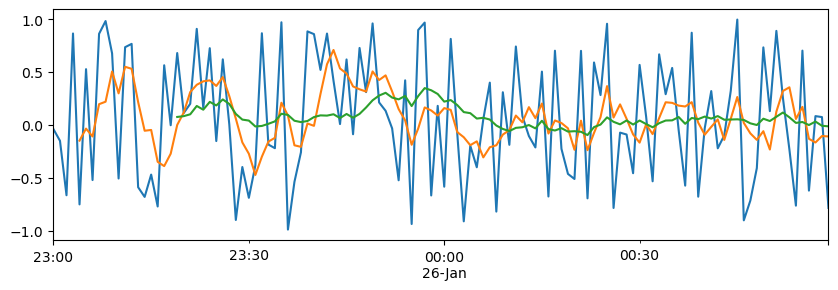

In [ ]:
# Скользящее окно
pm = 60 * 2  # 2 часа в минутах
periods_pm = pd.date_range('2023-01-25 23:00', periods=pm, freq='T')
ts65 = pd.Series(np.random.uniform(-1, 1, pm), index=periods_pm)
# окна - 5 и 20 минут
# более широкое окно дает меньший разброс значений, 
# а более узкие окна приведут к более высокому разбросу значений
ma5 = ts65.rolling(window=5, center=False).mean()
ma20 = ts65.rolling(window=20, center=False).mean()
ts65.plot(figsize=(10, 3))
ma5.plot(figsize=(10, 3))
ma20.plot(figsize=(10, 3))

<AxesSubplot:>

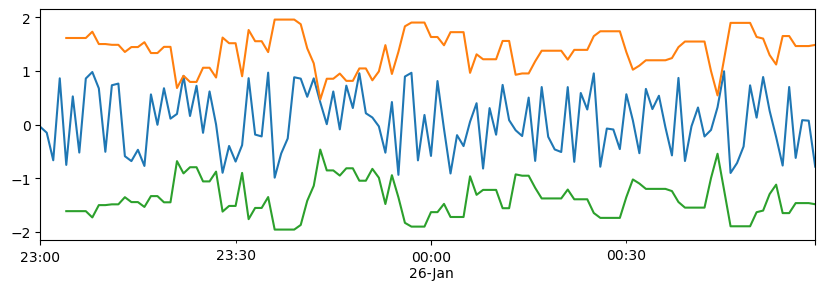

In [ ]:
# Скользящее окно + apply()
# применение любой пользовательской функцию
# передается список элементов попавших в окно
ap_xn = ts65.rolling(window=5, center=False).apply(lambda elems: max(elems) - min(elems), raw=True)
ap_nx = ts65.rolling(window=5, center=False).apply(lambda elems: min(elems) - max(elems), raw=True)
ts65.plot(figsize=(10, 3))
ap_xn.plot(figsize=(10, 3))
ap_nx.plot(figsize=(10, 3))

In [ ]:
# Period
aug2018 = pd.Period('2018-08-01', freq='M')
print(aug2018.start_time, aug2018.end_time)
# прибавление к объекту Period информирует о том, что 
# нужно осуществить сдвиг на 2 положительные единицы 
# частоты периода, данном случае на 2 месяца вперед
oct2018 = aug2018 + 2
print(oct2018.start_time, oct2018.end_time)

2018-08-01 00:00:00 2018-08-31 23:59:59.999999999
2018-10-01 00:00:00 2018-10-31 23:59:59.999999999


In [ ]:
# PeriodIndex
# PeriodIndex отличается от DatetimeIndex тем, что индексные метки являются объектами Period.
# Индексные метки - это периоды !
pi1 = pd.period_range('2023-01-25 00:00:00', periods=10, freq='H')
ts7 = pd.Series(np.random.uniform(-10, 10, 10), index=pi1)
ts7

2023-01-25 00:00   -0.121368
2023-01-25 01:00   -0.805364
2023-01-25 02:00   -9.532168
2023-01-25 03:00   -1.447645
2023-01-25 04:00    3.836564
2023-01-25 05:00   -2.945428
2023-01-25 06:00    5.691463
2023-01-25 07:00   -6.279502
2023-01-25 08:00   -1.636810
2023-01-25 09:00    7.945785
Freq: H, dtype: float64

### Визуализация

<AxesSubplot:>

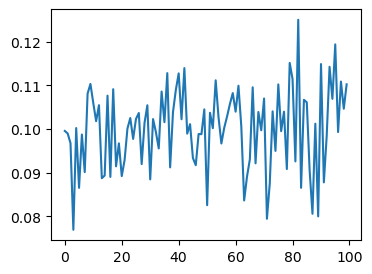

In [ ]:
# отображение series
ser_graph = pd.Series(np.random.normal(0.1, 0.01, 100))
ser_graph.plot(figsize=(4, 3))

<AxesSubplot:>

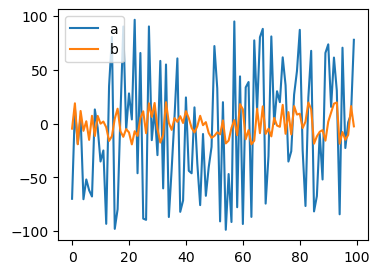

In [ ]:
# отображение DataFrame
df_graph = pd.DataFrame({'a': np.random.uniform(-100, 100, 100), 'b': np.random.uniform(-20, 20, 100)})
df_graph.plot(figsize=(4, 3))

AttributeError: 'Line2D' object has no property 'figsize'

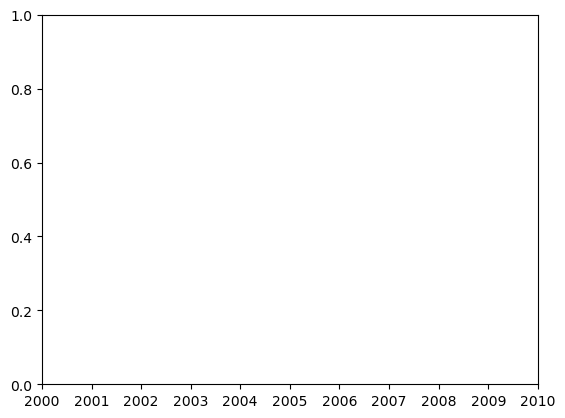

In [ ]:
# даты, локатор, форматер
from matplotlib.dates import MonthLocator, YearLocator, DateFormatter
dates = pd.date_range('2022-12-27', periods=50, freq='MS')
df_gr_dates = pd.DataFrame({'date': dates, 'val': np.random.randint(0, 100, 50)})

fig, ax = plt.subplots()
ax.plot(df_gr_dates['date'], df_gr_dates['val'])
ax.xaxis.set_minor_locator(MonthLocator(bymonth=(4, 7, 10), interval=1))
ax.xaxis.set_minor_formatter(DateFormatter('%b'))
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y   %b'))
fig.autofmt_xdate(which='both', rotation=90, ha='center')

#### Столбиковая диаграмма

<AxesSubplot:>

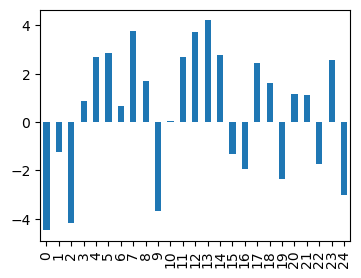

In [ ]:
bar_ser = pd.Series(np.random.uniform(-5, 5, 25))
bar_ser.plot(kind='bar', figsize=(4, 3))

<AxesSubplot:>

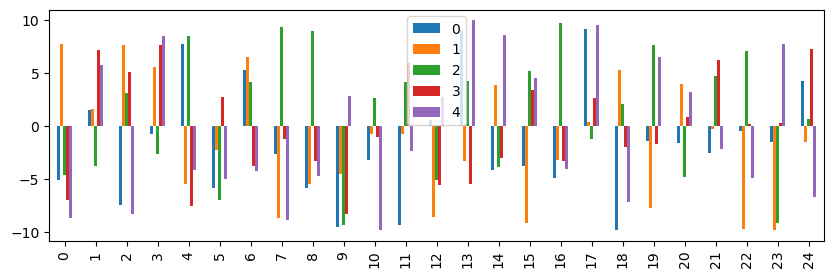

In [ ]:
# для нескольких столбцов
bar_df = pd.DataFrame(np.random.uniform(-10, 10, (25, 5)))
bar_df.plot(kind='bar', figsize=(10, 3))

<AxesSubplot:>

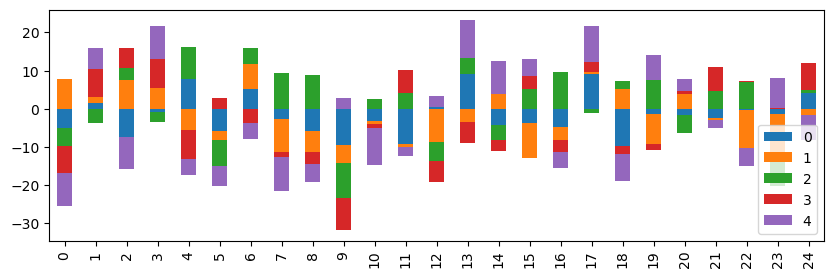

In [ ]:
# состыковка
bar_df.plot(kind='bar', stacked=True, figsize=(10, 3))

#### Гистограмма
Визуализация распределения данных

<AxesSubplot:>

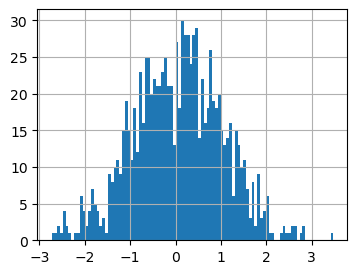

In [ ]:
hist_ser = pd.Series(np.random.randn(1000))
# bins - количество интервалов - по-умолчанию 10
hist_ser.hist(bins=100, figsize=(4, 3))

#### Диаграмма рассеяния
Визуализация корреляции между двумя переменными.

<AxesSubplot:xlabel='a', ylabel='b'>

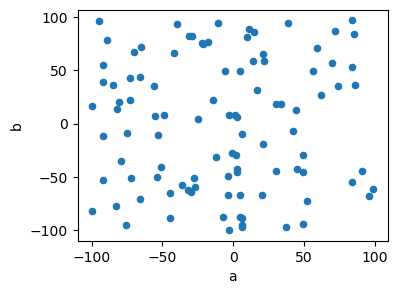

In [ ]:
scat_df = pd.DataFrame(np.random.randint(-100, 100, (100, 2)), columns=['a', 'b'])
scat_df.plot(kind='scatter', x='a', y='b', figsize=(4, 3))

array([[<AxesSubplot:xlabel='0', ylabel='0'>,
        <AxesSubplot:xlabel='1', ylabel='0'>,
        <AxesSubplot:xlabel='2', ylabel='0'>,
        <AxesSubplot:xlabel='3', ylabel='0'>,
        <AxesSubplot:xlabel='4', ylabel='0'>],
       [<AxesSubplot:xlabel='0', ylabel='1'>,
        <AxesSubplot:xlabel='1', ylabel='1'>,
        <AxesSubplot:xlabel='2', ylabel='1'>,
        <AxesSubplot:xlabel='3', ylabel='1'>,
        <AxesSubplot:xlabel='4', ylabel='1'>],
       [<AxesSubplot:xlabel='0', ylabel='2'>,
        <AxesSubplot:xlabel='1', ylabel='2'>,
        <AxesSubplot:xlabel='2', ylabel='2'>,
        <AxesSubplot:xlabel='3', ylabel='2'>,
        <AxesSubplot:xlabel='4', ylabel='2'>],
       [<AxesSubplot:xlabel='0', ylabel='3'>,
        <AxesSubplot:xlabel='1', ylabel='3'>,
        <AxesSubplot:xlabel='2', ylabel='3'>,
        <AxesSubplot:xlabel='3', ylabel='3'>,
        <AxesSubplot:xlabel='4', ylabel='3'>],
       [<AxesSubplot:xlabel='0', ylabel='4'>,
        <AxesSubplot:xlabel='1

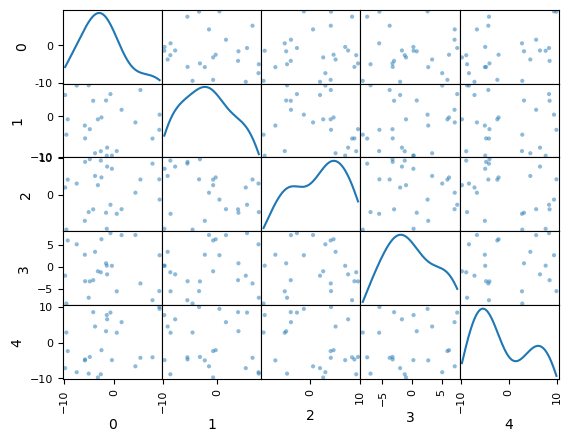

In [ ]:
# матрица диаграмм рассеяния
# корреляция для каждой комбинации переменных
from pandas.plotting import scatter_matrix
# по диагонали = график ядерной оценки плотности для каждой переменной
scatter_matrix(bar_df, diagonal='kde')

### Оптимизация 

In [ ]:
df_opt = df.copy()
df_opt

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [ ]:
def mem_usage(obj):
    mu = obj.memory_usage(deep=True)
    if isinstance(obj, pd.DataFrame):
        mu = mu.sum()
    return f'{(mu / 1024):.2f} kb'

print(mem_usage(df_opt))

398.13 kb


In [ ]:
# int
# поиск всех столбцов с типом int
int_cols = df_opt.select_dtypes(include=['int'])
int_cols_mod = int_cols.apply(pd.to_numeric, downcast='integer')
# на сколько измениться занятая память данными после изменения типа данных
print(mem_usage(int_cols))
print(mem_usage(int_cols_mod))

27.97 kb
3.61 kb


In [ ]:
# float
# поиск всех столбцов с типом float
float_cols = df_opt.select_dtypes(include=['float'])
float_cols_mod = float_cols.apply(pd.to_numeric, downcast='float')
# на сколько измениться занятая память данными после изменения типа данных
print(mem_usage(float_cols))
print(mem_usage(float_cols_mod))

14.05 kb
7.09 kb


In [ ]:
# обновляем столбцы с новыми типами данных
df_opt[int_cols_mod.columns] = int_cols_mod
df_opt[float_cols_mod.columns] = float_cols_mod
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int8   
 1   pclass       891 non-null    int8   
 2   sex          891 non-null    object 
 3   age          714 non-null    float32
 4   sibsp        891 non-null    int8   
 5   parch        891 non-null    int8   
 6   fare         891 non-null    float32
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float32(2), int8(4), object(7)
memory usage: 61.0+ KB


In [ ]:
# object !
# поиск всех столбцов с типом object
obj_cols = df_opt.select_dtypes(include=['object'])
obj_cols.describe()
# все столбцы содержат несколько уникальных значений по сравнению с общим количеством

,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


In [ ]:
# в категориальный тип данных, значения выглядат ТАКЖЕ, но тип category !
# нельзя выполнять арифметические операции со столбцами типа category или 
# использовать такие методы, как .min() и .max(), не присвоив столбцам 
# настоящий числовой тип. 
# Необходимо придерживаться типа category преимущественно при работе с 
# такими столбцами object, в которых менее 50% значений являются уникальными.
obj_cols_mod = obj_cols.astype('category')
print(mem_usage(obj_cols))
print(mem_usage(obj_cols_mod))

354.62 kb
8.50 kb


In [ ]:
df_opt[obj_cols_mod.columns] = obj_cols_mod
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int8    
 1   pclass       891 non-null    int8    
 2   sex          891 non-null    category
 3   age          714 non-null    float32 
 4   sibsp        891 non-null    int8    
 5   parch        891 non-null    int8    
 6   fare         891 non-null    float32 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    category
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    category
 13  alive        891 non-null    category
 14  alone        891 non-null    bool    
dtypes: bool(2), category(7), float32(2), int8(4)
memory usage: 19.5 KB


In [ ]:
# datetime
# имеет смысл преобразовать столбец даты в тип datetime,
# поскольку это позволит более легко проводить анализ временных рядов
# df['date'] = pd.to_datetime(df.date, format='%Y%m%d')

### Работа с данными

1. Формирование выборки
    * формирование окна выборки и окна созревания  
    * определение зависимой переменной  
    * определение необходимого размера выборки  
2. Предварительная обработка данных  

    * До разбиения на обучающую и контрольную выборки / выполнения цикла перекрестной проверки  
        
        - загрузка данных  

        - удаление очевидных бесполезных переменных (переменных, у которых количество категорий совпадает с количеством  
        наблюдений, или переменных с одним уникальным значением, переменных, не фиксировавшихся в течение всего периода  
        сбора исторических данных) и переменных «из будущего»  

        - преобразование типов данных (например, часто количественная переменная бывает записана как категориальная из-за  
        проблем с десятичным разделителем, зависимая переменная-флаг, приминимающая значения 0 или 1, записана как  
        целочисленная переменная)  

        - нормализация строковых значений (удаление лишних символов, приведение к одному и тому же стандарту,  
        приведение к одному и тому же регистру) и обработка дублирующихся наблюдений  

        - обработка редких категорий, которую можно выполнить до разбиения на обучающую и контрольную  
        выборки/выполнения перекрестной проверки (укрупнение по бизнес-логике, без вычисления порога укрупнения)  
            * Если переменная содержит 2-3 редких категорий небольшой частоты, скорее всего, такие категории случайны и  
            могли быть обусловлены ошибками ввода. В таком случае эти категории, как правило, объединяют с самой часто  
            встречающейся категорией или объединяют по смыслу.  
            * Если переменная содержит множество категорий небольшой частоты, нам необходимо задать порог укрупнения –  
            минимальное количество наблюдений в категории, ниже которого категория объявляется редкой.  
            * Множественные редкие категории часто объединяют в одну отдельную категорию, если подтверждается гипотеза  
            о том, что редкие категории описывают определенный паттерн.  
            * Новую категорию можно приравнять к самой часто встречающейся категории (медиане, моде и т.д.) или приравнять  
            к пропуску и обрабатывать так, как было условлено обрабатывать пропуски.  

        - импутация пропусков, которую можно выполнить до разбиения на обучающую и контрольную выборки/выполнения  
        перекрестной проверки (не используются вычисления по набору данных: импутация константами, выделение пропусков в  
        отдельную категорию)  

        - конструирование новых признаков, которое можно выполнить до разбиения на обучающую и контрольную выборки/выполнения  
        перекрестной проверки (не используются вычисления по набору данных: агрегаты, взаимодействия)  

    * После разбиения на обучающую и контрольную выборки / внутри цикла перекрестной проверки  

        - выполнение преобразований, максимизирующих нормальность  

        - обработка редких категорий, которую можно выполнить только после разбиения на обучающую и контрольную выборки/в  
        цикле перекрестной проверки  (укрупнение по определенному порогу, часто выполняют до разбиения).  

        - импутация пропусков, которую можно выполнить только после разбиения на обучающую и контрольную выборки/внутри  
        цикла перекрестной проверки (используются вычисления по набору данных: импутация статистиками – средним, медианой,  
        модой и т.д.). Необходимо проанализировать взаимосвязь между переменной с пропусками и другими переменными.

        - конструирование новых признаков, которое можно выполнить только после разбиения на обучающую и контрольную  
        выборки/внутри цикла перекрестной проверки (используются вычисления по набору данных: биннинг, frequency  
        encoding, likelihood encoding)  

        - стандартизация данных  
        - дамми-кодирование (представление каждой категории предиктора в виде бинарного признака, по методу  
        неполного ранга и по методу полного ранга)  
        


### Метрики качества

Матрица ошибок  
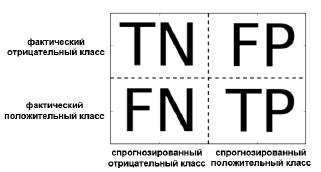

Классификация:
- **Accuracy (правильность, доля правильных ответов).**  
  Количество правильно классифицированных случаев поделенное на общее количество случаев.  
  Acc = (TP + TN) / (TP + TN + FP + FN)  
  Не может служить достоверной метрикой качества при работе с несбалансированными наборами данных.  
  
- **Precision (точность)**  
  Количество истинно положительных случаев, поделенное на общее количество предсказанных положительных случаев.  
  P = TP / (TP + FP)  

- **Sensitivity (чувствительность, полнота, recall).**  
  Количество истинно положительных случаев (True Positive Rate), поделенное на общее количество положительных случаев.  
  Se = TP / (TP + FN)  

- **Specificity (специфичность).**  
  Количество истинно отрицательных случаев (True Negatives Rate), поделенное на общее количество отрицательных случаев.  
  Sp = TN / (TN + FP)  

- **1–Specificit (1–специфичность).**  
  Количество ложно положительных случаев (False Positives Rate), поделенное на общее количество отрицательных случаев.  
  One_Sp = FP / (FP + TN)  

- **AUC-ROC (площадь под ROC-кривой)**  
  Чем больше значение AUC, тем выше качество модели.  

- **AUC-PR (площадь под PR-кривой)**  


- **F1-мера**  
F = 2 * ((P * Se) / (P + Se)) 